# Machine Learning Group Project
## Team B

In [401]:
# Set the display
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

To tackle the exercise we will follow the **Machine Learning pipeline** as stated in class:

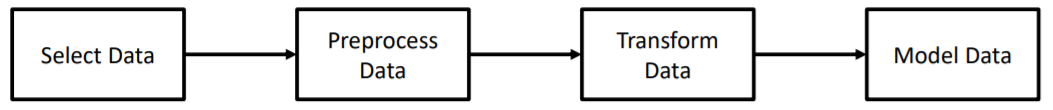

In [1]:
#from IPython.display import Image
#Image(filename='ML_process.png')

<a id='tc'></a>

# Table of Contents

* [1. Select data](#1)
* [2. Pre-process data](#2)
* [3. Transform data ](#3)
    * [3.1. Outliers identification and exclusion](#3.1.)
    * [3.2. Feature Engineering](#3.2.)
        * [3.2.1. Feature creationg](#3.2.1.)
        * [3.2.2. Exploring the new features](#3.2.2.)
        * [3.2.3. PCA analysis](#3.2.3.)
        * [3.2.4. Transform categorical variables into dummy](#3.2.4.)
* [4. Model data](#4)
* [5. Best Model - training](#5)
* [6. Final model - test](#6)

# 0. Load Libraries

In [1]:
# Import the necessary libraries for the analysis

# Data processing
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# Scikit libraries
from sklearn import linear_model, datasets, svm, metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif, SelectFromModel
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, truncnorm, randint
import xgboost

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint

# 1. Select data
<a id='1'></a>

We were provided with 2 datasets: 

* training_set.csv
* test_set.csv

Both were part of the Kaggle competition: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

The dataset consists of ~700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot have been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411.

## 1.1. Load train and test data from CSV

In [2]:
# Loading the csv files

df = pd.read_csv('training_set.csv')
testdf = pd.read_csv('test_set.csv')

In [3]:
df.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,94.96,11.0,2.0,de_train,False,392.0,500.0,379.0,500.0,23300.0,...,5.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0,CT
1,175.00,13.0,9.0,de_nuke,False,500.0,500.0,0.0,300.0,28150.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,T
2,175.00,14.0,11.0,de_inferno,False,500.0,500.0,486.0,288.0,11650.0,...,3.0,5.0,2.0,3.0,0.0,1.0,3.0,0.0,0.0,T
3,74.89,12.0,11.0,de_inferno,False,439.0,489.0,443.0,434.0,3500.0,...,4.0,4.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,CT
4,110.04,3.0,12.0,de_nuke,False,500.0,500.0,500.0,400.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,T


## 1.2. EDA
<a id='1.2'></a>

### 1.2.1 Explore general characteristics of the datasets

#### 1.2.1.1. Train set

In [4]:
df.shape

(82014, 97)

In [5]:
# To identify the types
df.dtypes

time_left                    float64
ct_score                     float64
t_score                      float64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                  object
Length: 97, dtype: object

#### 1.2.1.2. Test set

In [6]:
testdf.shape

(40396, 96)

In [7]:
# To identify the types
testdf.dtypes

time_left                      float64
ct_score                       float64
t_score                        float64
map                             object
bomb_planted                      bool
                                ...   
t_grenade_incendiarygrenade    float64
ct_grenade_molotovgrenade      float64
t_grenade_molotovgrenade       float64
ct_grenade_decoygrenade        float64
t_grenade_decoygrenade         float64
Length: 96, dtype: object

### 1.2.2. EDA using ProfileReport on train data

In [8]:
# Getting a detailed report of the dataset, as a first 

# reporttrain = ProfileReport(df)

In [9]:
# As we have many features, is better to export the report not to crash 'google chrome'

# reporttrain.to_file("CS_GO_Report.html")

Transform these 2 variables from categorical to numerical, we run these here for technical reasons of the code, but they are repeated in the Tranfrom Data section because there it's their proper place.

In [10]:
# Converting column 'bomb_planted' into a numeric
df['bomb_planted'] = df['bomb_planted'].astype('float64')

In [11]:
df['bomb_planted'].unique()

array([0., 1.])

In [12]:
# Converting column 'round_winner' into numeric
df['round_winner'].replace(['CT','T'], [0,1], inplace=True)

In [13]:
df['round_winner'].unique()

array([0, 1], dtype=int64)

#### [Get back](#tc)

# 2. Pre-process data
<a id='2'></a>

## 2.1 Outliers identification and exclusion
<a id='2.1'></a>

In [14]:
# We organize the columns so the single columns are first and the columns that come in "tuples" stay together. e.g. all counter terrorist related column and terrorist related columns

cols_to_order = ['round_winner','time_left', 'map','bomb_planted', 'ct_defuse_kits', 'ct_grenade_flashbang', 't_grenade_flashbang']
new_columns = cols_to_order + (df.columns.drop(cols_to_order).tolist())
df = df[new_columns]

In [15]:
# Create business parameter (According to rules of the game) to flag outliers for each variable; if a value of the variable is higher than this parameter the entire row will be considered an outlier from a business point of view and dropped

parameters_1 = [-1, -1, -1, -1, 5, 10, 10, -1, -1, 500, 500, 500, 500, 80000, 80000] #values fir variables until money
parameters_2 = [5] * 82 #values for all the rest of weapons
parameters = parameters_1 + parameters_2
ser_par = pd.Series(parameters, index = df.columns)

In [16]:
# Understand for each feature if it has 'outliers' and 'NAs'

results = pd.DataFrame(np.nan, index=df.columns, columns=['Outlier', 'NAs'])

for i, j in enumerate(ser_par):
    if j > 0:
        a = (df[ser_par.index[i]]>j).sum().astype('bool')
        b = df[ser_par.index[i]].isna().sum().astype('bool')
        results.loc[ser_par.index[i], 'Outlier'] = a
        results.loc[ser_par.index[i], 'NAs'] = b  

In [17]:
# Display which rows have outliers and NAs

results[(results['Outlier'] == True) | (results['NAs'] == True)]

,Outlier,NAs
t_health,True,False
t_players_alive,True,False
t_weapon_cz75auto,True,False
t_weapon_glock,True,False
ct_weapon_usps,True,False


In [18]:
# Create a dataframe with the number of occurrences for each value for the weapons ralated variables

results2 = pd.DataFrame()

# Subset the columns associated with weapons, grenades and the defuse kit

for i in df.columns[np.r_[4:7, 15:len(df.columns)]]:
    x = df.groupby(i)[i].count()
    results2 = pd.concat([results2, x], axis = 1)


# Calculate the transposed matrix, table of frequencies

results3 = results2.T
results3[results3.index.isin(results[(results['Outlier'] == True) | (results['NAs'] == True)].index.tolist())]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0
t_players_alive,775.0,3883.0,5131.0,7341.0,10672.0,54211.0,1.0,NaN,NaN,NaN
t_weapon_cz75auto,74970.0,5725.0,1022.0,251.0,44.0,1.0,1.0,NaN,NaN,NaN
t_weapon_glock,6034.0,8537.0,10606.0,13281.0,16294.0,27252.0,8.0,1.0,1.0,NaN
ct_weapon_usps,5390.0,10280.0,11668.0,14258.0,18053.0,22356.0,4.0,1.0,2.0,2.0


Now we will calculate for each row how many columns are not respecting the business rules defined in 'ser_par'.

For that we test versus the Dataframe of True/False 'results'

In [19]:
df.head(2)

,round_winner,time_left,map,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0,94.96,de_train,0.0,4.0,3.0,5.0,11.0,2.0,392.0,...,0.0,0.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0
1,1,175.00,de_nuke,0.0,0.0,0.0,3.0,13.0,9.0,500.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
ser_par

round_winner                  -1
time_left                     -1
map                           -1
bomb_planted                  -1
ct_defuse_kits                 5
                              ..
t_grenade_incendiarygrenade    5
ct_grenade_molotovgrenade      5
t_grenade_molotovgrenade       5
ct_grenade_decoygrenade        5
t_grenade_decoygrenade         5
Length: 97, dtype: int64

In [21]:
# Checking vs the business rules 'ser_par'

result4 = pd.DataFrame(index = df.index)

for i, j in enumerate(ser_par):
    if j > 0:
        a = df[ser_par.index[i]] > j
        result4 = pd.concat([result4, a], axis = 1)
    else:
        b = df[ser_par.index[0]] < -1
        b = pd.Series(b, name = ser_par.index[i])
        result4 = pd.concat([result4, b], axis = 1)

In [22]:
# Calculate sum by row to sum how many True (outlier = 1) values are present in that row

sum_row = result4.sum(axis = 1)

In [23]:
# Here shows how many rows are going to be dropped from the original df

sum_row[sum_row > 0].count()

15

In [24]:
# Here shows the index of the rows that are going to be dropped

sum_row[sum_row > 0]

9754     2
10420    1
23662    1
23738    1
25697    1
27297    1
40521    2
43406    1
44956    1
46165    2
46347    3
46926    1
55144    1
72303    2
78205    2
dtype: int64

In [25]:
# These are the rows that we need to drop from the dataframe because they are not within the boundaries defined by the business rule

df.loc[sum_row > 0]

,round_winner,time_left,map,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
9754,1,175.00,de_mirage,0.0,0.0,2.0,5.0,9.0,14.0,500.0,...,1.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0
10420,0,175.00,de_dust2,0.0,0.0,0.0,0.0,24.0,24.0,500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23662,1,175.00,de_nuke,0.0,0.0,1.0,4.0,4.0,5.0,500.0,...,0.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
23738,1,169.94,de_dust2,0.0,0.0,0.0,0.0,15.0,15.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25697,0,175.00,de_mirage,0.0,4.0,5.0,0.0,4.0,5.0,500.0,...,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
27297,1,175.00,de_mirage,0.0,0.0,0.0,1.0,7.0,12.0,500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40521,0,175.00,de_inferno,0.0,4.0,6.0,2.0,7.0,7.0,500.0,...,4.0,1.0,3.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0
43406,1,170.00,de_dust2,0.0,0.0,3.0,3.0,12.0,14.0,500.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0
44956,0,175.00,de_mirage,0.0,0.0,1.0,0.0,15.0,15.0,500.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46165,1,175.00,de_nuke,0.0,1.0,1.0,2.0,2.0,4.0,500.0,...,0.0,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0


These are the rows that we will keep in the dataframe.

In [26]:
df = df.loc[sum_row == 0].reset_index(drop=True)
df.head(5)

,round_winner,time_left,map,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0,94.96,de_train,0.0,4.0,3.0,5.0,11.0,2.0,392.0,...,0.0,0.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0
1,1,175.00,de_nuke,0.0,0.0,0.0,3.0,13.0,9.0,500.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,175.00,de_inferno,0.0,3.0,5.0,3.0,14.0,11.0,500.0,...,4.0,1.0,5.0,2.0,3.0,0.0,1.0,3.0,0.0,0.0
3,0,74.89,de_inferno,0.0,4.0,4.0,4.0,12.0,11.0,439.0,...,1.0,1.0,4.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0
4,1,110.04,de_nuke,0.0,0.0,0.0,0.0,3.0,12.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [27]:
# Original dataframe shape               = (82014, 97)
# New dataframe without 'outliers' shape = (81999, 97)
# The difference = 15 , are the rows that had outliers in one or more columns
df.shape

(81999, 97)

#### [Get back](#tc)

# 3. Transform data
<a id='3'></a>

## 3.1. Convert columns types

As said before, we run these cells before, but their natural place is here.

In [28]:
# Converting column 'bomb_planted' into a numeric
# df['bomb_planted'] = df['bomb_planted'].astype('float64')

In [29]:
# df['bomb_planted'].unique()

In [30]:
# Converting column 'round_winner' into numeric
# df['round_winner'].replace(['CT','T'], [0,1], inplace=True)

In [31]:
# df['round_winner'].unique()

## 3.2. Feature Engineering
<a id='3.2.'></a>

In order to understand the impact of the different features towards predicting the target variable, we analyized the correlation between features of the same 'type' of column and their difference.
Then we plotted everything into a Heatmap for each 'type' of columns

Conclusion: 
   * Overall the heatmaps, show that the impact of the difference or 'delta' is more relevant to predict the target variable than the original features by themselves
   * The delta features seems promising, but further analysis need to be done before modeling

e.g. Columns health: ct_health = -0.19, t_health = 0.09, delta_health = -0.4 // 0 = counter terrorist, 1 = terrorist

### 3.2.1. Feature creation
<a id='3.2.1.'></a>

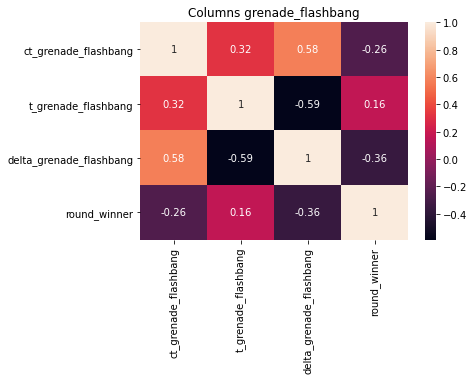

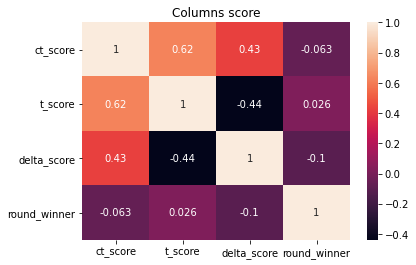

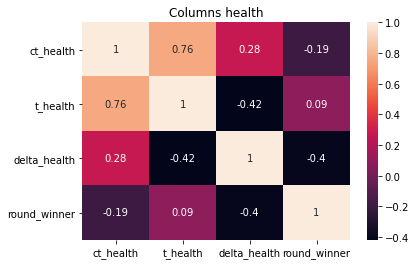

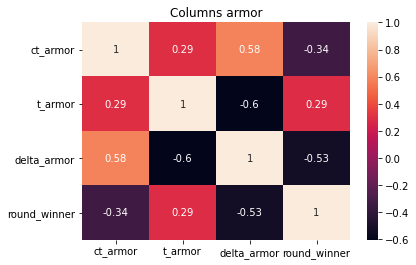

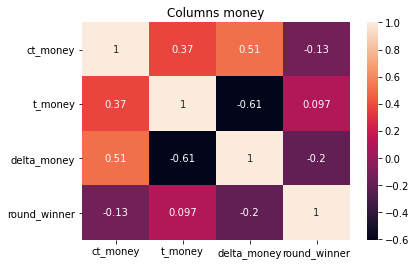

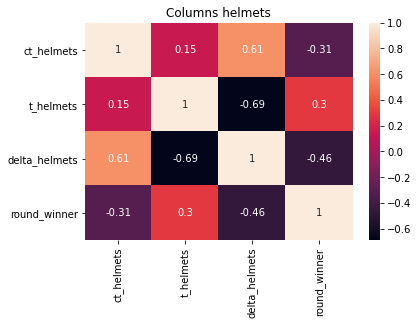

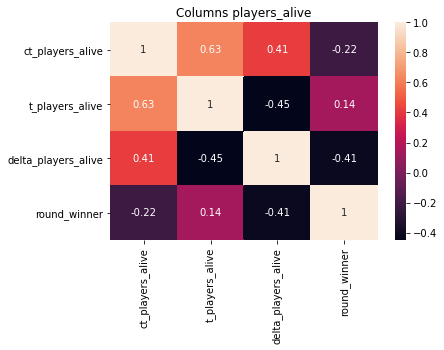

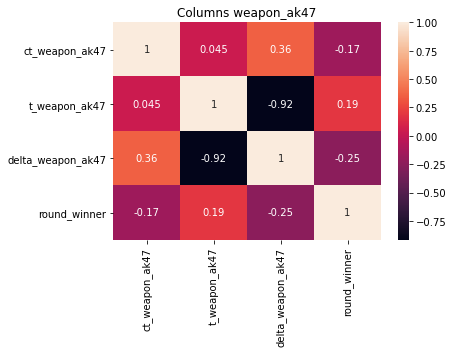

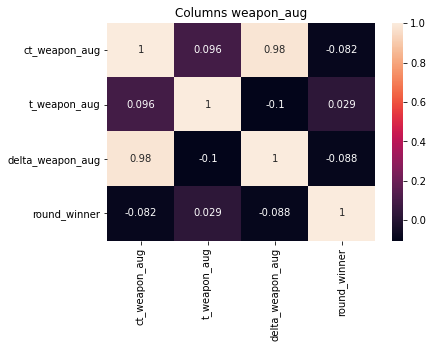

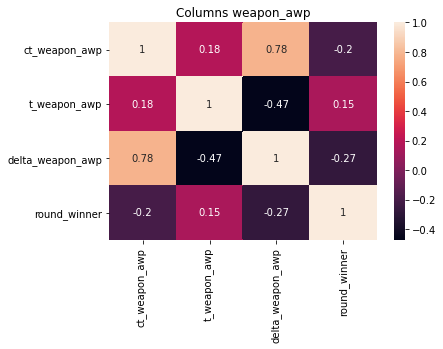

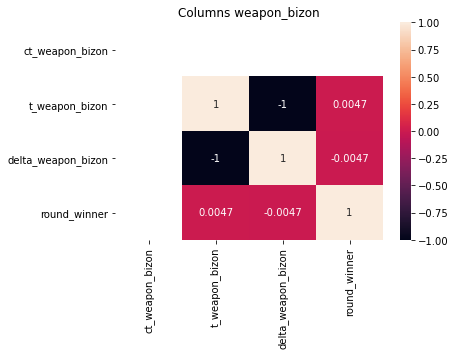

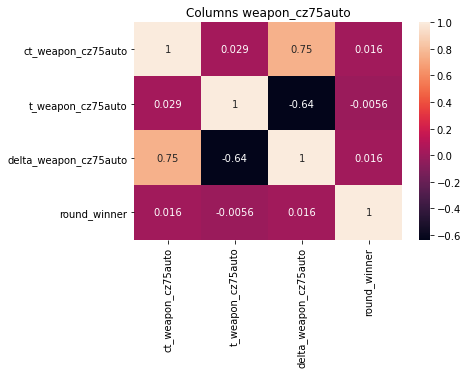

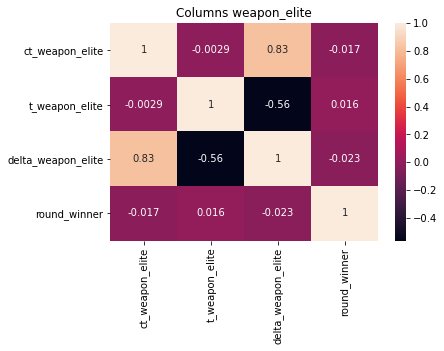

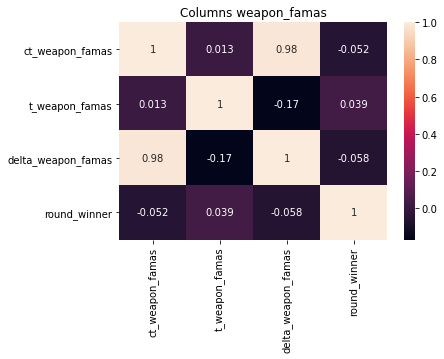

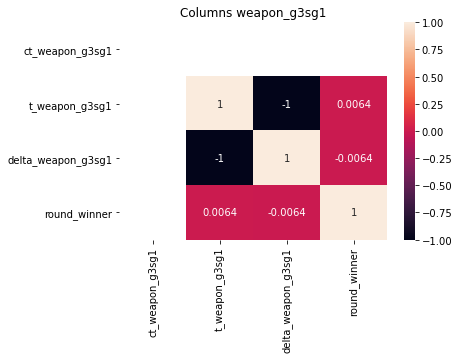

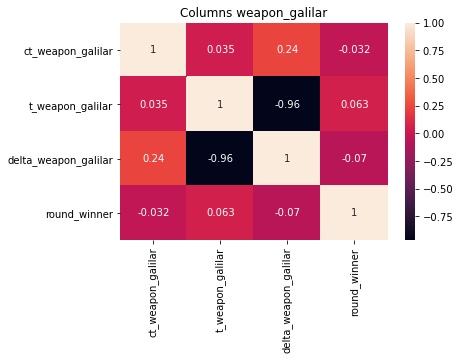

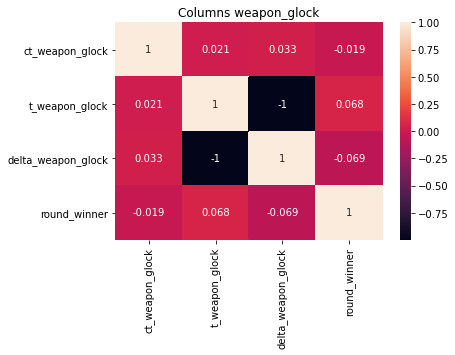

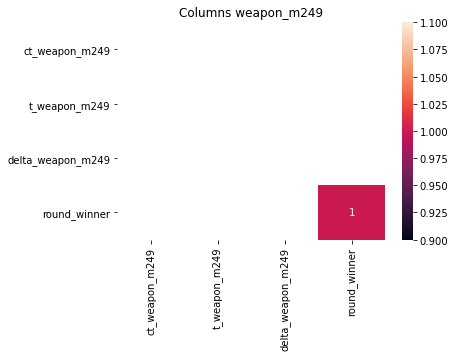

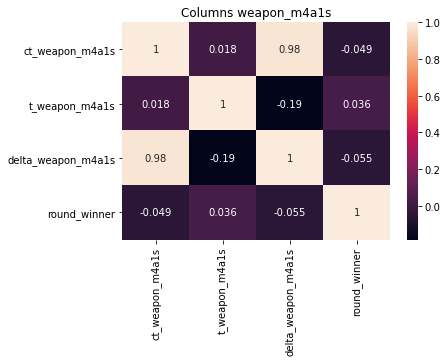

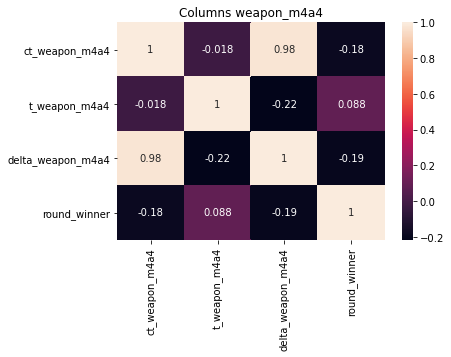

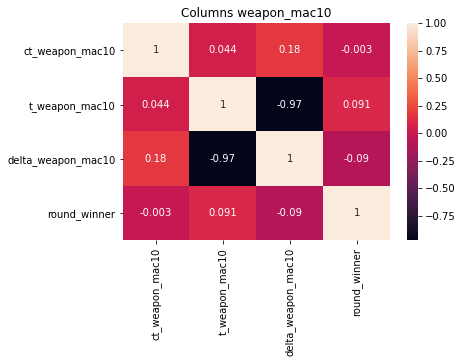

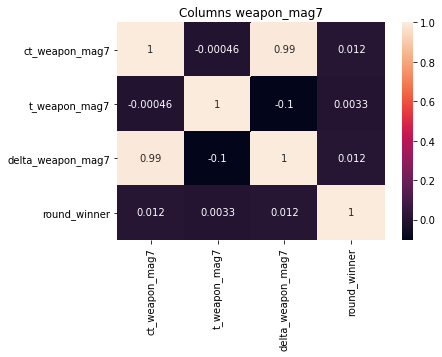

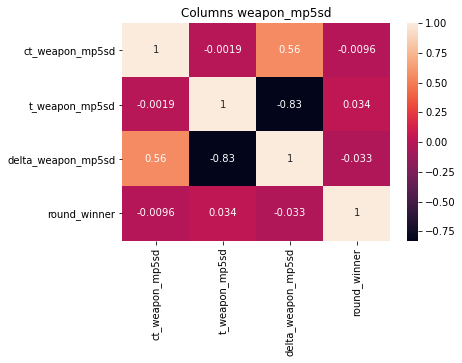

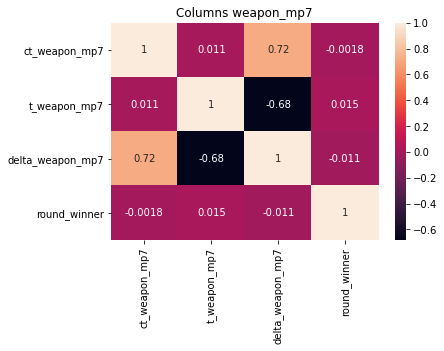

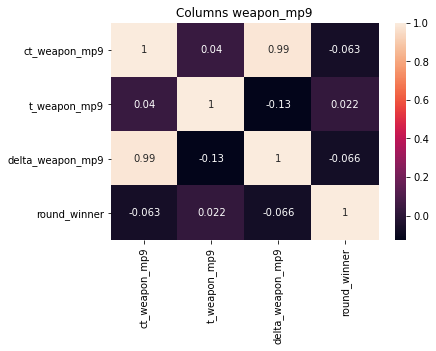

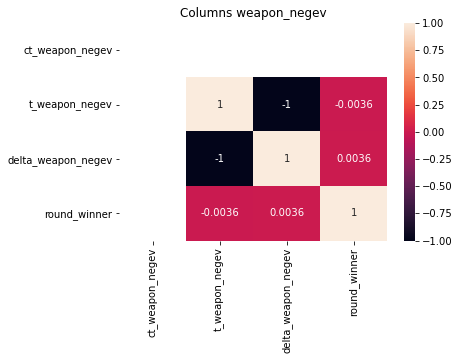

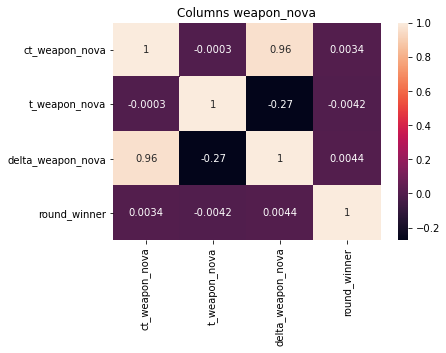

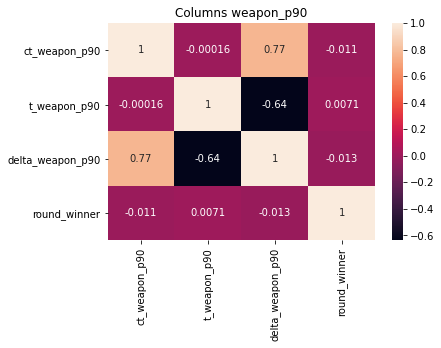

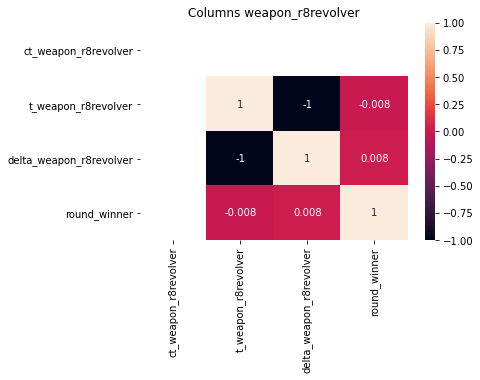

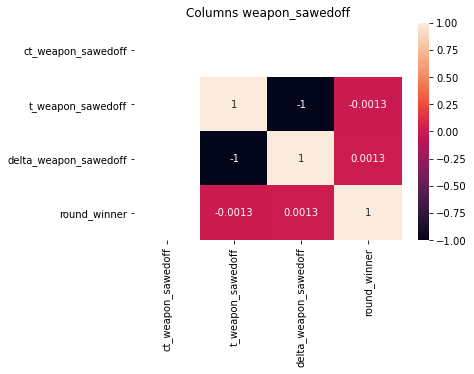

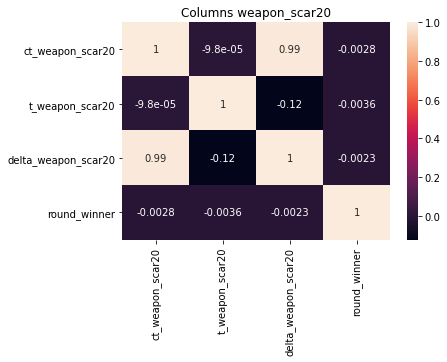

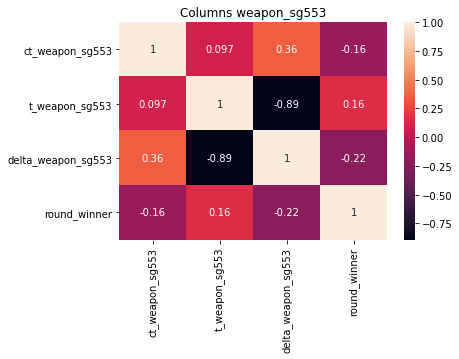

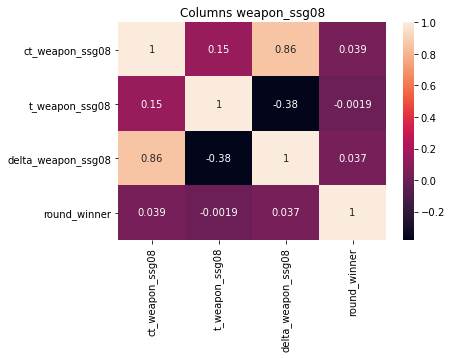

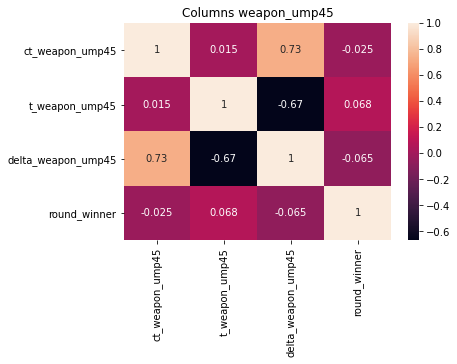

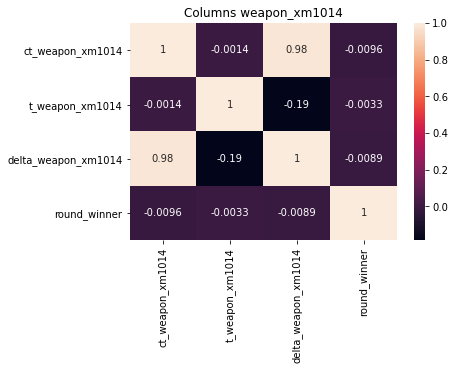

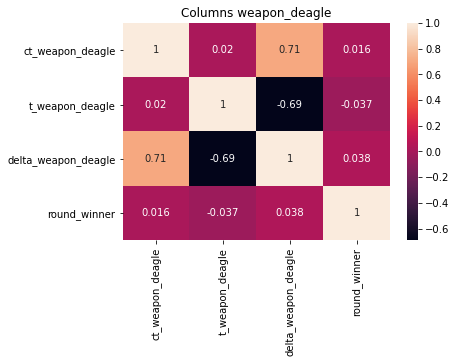

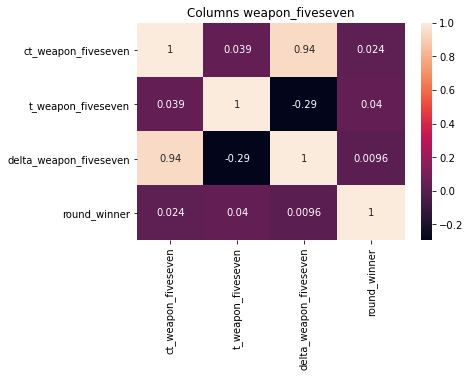

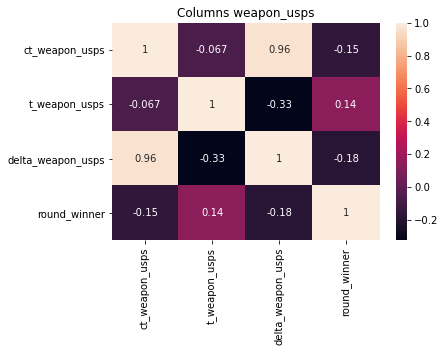

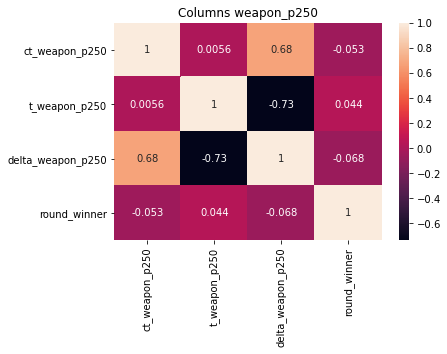

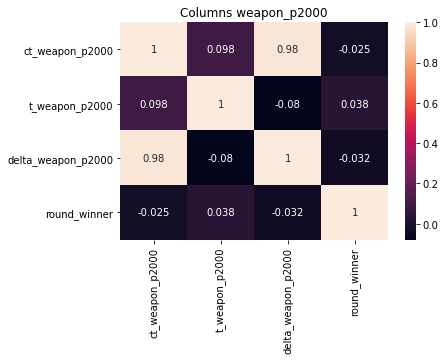

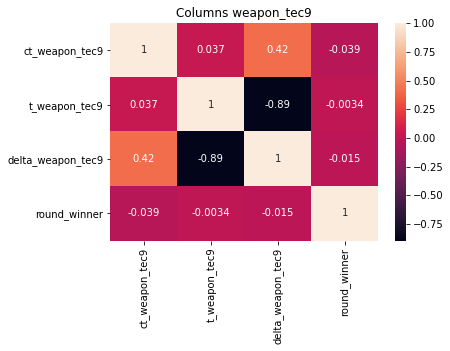

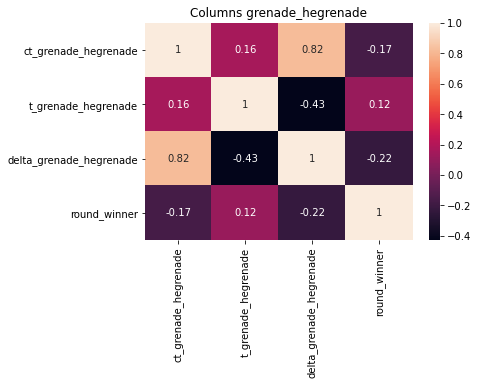

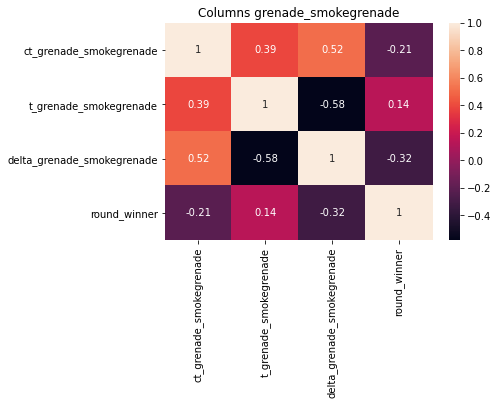

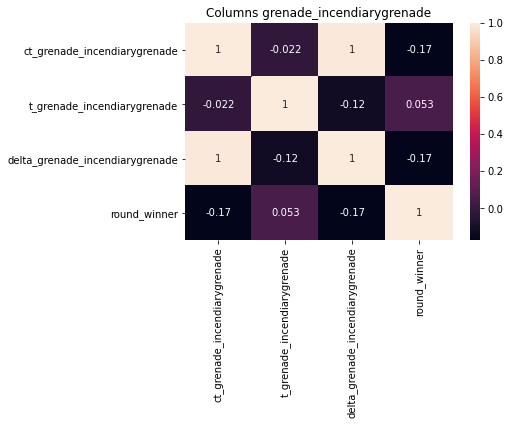

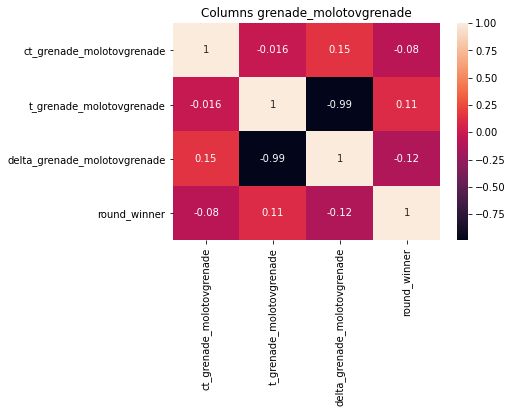

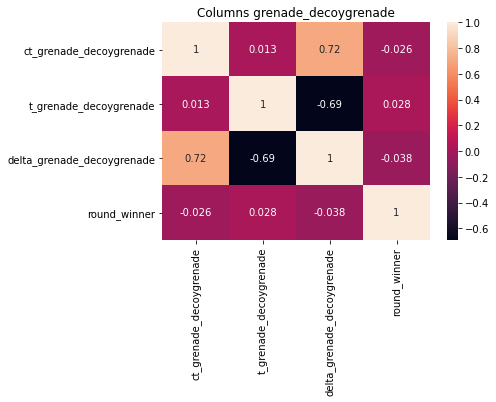

In [32]:
# First we subset the first columns of the dataset to run the profile

df_1 = df.copy() # avoid changing the original daaframe by mak
corr_df = pd.DataFrame(columns = ['Var_name','Target_variable'])
delta_df = pd.DataFrame(df.iloc[:,0:5])

i = 5

# we create the delta columns
while i < (len(df.columns)):
    
    a = df_1.iloc[:,i]
    b = df_1.iloc[:,i+1]
    df_1['delta_'+df_1.iloc[:,i].name[3:]] = a - b
    c = df_1['round_winner']
    
    
    delta_df['delta_'+df_1.iloc[:,i].name[3:]] = a - b
    corr = df_1[[a.name, b.name,'delta_'+df_1.iloc[:,i].name[3:]]].corrwith(c)
    corr_df = corr_df.append({'Var_name':a.name,'Target_variable':corr[0]}, ignore_index=True)
    corr_df = corr_df.append({'Var_name':b.name,'Target_variable':corr[1]}, ignore_index=True)
    corr_df = corr_df.append({'Var_name':'delta_'+df_1.iloc[:,i].name[3:],'Target_variable':corr[2]}, ignore_index=True)

    corr = df_1[[a.name, b.name,'delta_'+df_1.iloc[:,i].name[3:],'round_winner']].corr()
    sns.heatmap(corr, annot = True)
    plt.title('Columns '+df_1.iloc[:,i].name[3:])
    plt.show()
    i = i + 2

del(corr)

We are going to create some columns based on the weapon category. We will follow the next steps:

   1. Obtain a weapons dataframe, with the categories of each weapon of the game
   2. Create 2 new columns corresponding to the names of the columns in the pre-processed 'df', to match coincidences
   3. Create 4 additional dataframes:
       
       3.1 showing the sum of weapons per category for both ct and t: "weapcat_sum_df"
      
       3.2 showing the avg of weapons per category for both ct and t: "weapcat_avg_df"
       
       3.2 showing the difference per weapon category between ct and t: "weapcat_deltas_df"
       
       3.4 showing the difference of the average between ct and t per weapon category: "weapcat_deltaa_df"

In [33]:
# 1. we import the dataframe containing the weapons category description

cat_df = pd.read_csv('WeaponCategory.csv')

In [34]:
# 2. Create 2 new columns corresponding to the names of the columns in df, so we can have a correspondence 

cat_df['ct_cols'] = "ct_" + cat_df['Weapon_name'] 
cat_df['t_cols'] = "t_" + cat_df['Weapon_name'] 

In [35]:
# 3. create 4 dataframes: 
#   3.1 showing the sum of weapons per category for both ct and t
#   3.2 showing the avg of weapons per category for both ct and t
#   3.3 showing the difference of the sums between ct and t per weapon category  
#   3.4 showing the difference of the average between ct and t per weapon category  

weapcat_sum_df = pd.DataFrame(df.iloc[:,np.r_[0:5, 7:19]])
weapcat_avg_df = pd.DataFrame(df.iloc[:,np.r_[0:5, 7:19]])
weapcat_deltas_df = pd.DataFrame(delta_df.iloc[:,np.r_[0:5, 6:12]])
weapcat_deltaa_df = pd.DataFrame(delta_df.iloc[:,np.r_[0:5, 6:12]])

for i in cat_df['Category'].unique():
    #print(i)
    ct = df[cat_df[cat_df['Category']==i]['ct_cols']]
    t = df[cat_df[cat_df['Category']==i]['t_cols']]
    
    weapcat_sum_df['ct_'+i] = ct.sum(axis=1)
    weapcat_sum_df['t_'+i] = t.sum(axis=1)
    weapcat_avg_df['ct_'+i] = ct.mean(axis=1)
    weapcat_avg_df['t_'+i] = t.mean(axis=1)
    
    weapcat_deltas_df['dlt_'+i] = ct.sum(axis=1) -t.sum(axis=1)
    weapcat_deltaa_df['dlt_'+i] = ct.mean(axis=1) -t.mean(axis=1)
    
del(cat_df,ct, t)

In [36]:
weapcat_deltaa_df.head()

,round_winner,time_left,map,bomb_planted,ct_defuse_kits,delta_score,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,dlt_None,dlt_Rifle,dlt_Pistol,dlt_Heavy,dlt_SMGs,dlt_Grenade
0,0,94.96,de_train,0.0,4.0,9.0,-108.0,-121.0,20800.0,-1.0,-1.0,0.0,0.000000,-0.111111,0.0,-0.142857,-1.333333
1,1,175.00,de_nuke,0.0,0.0,4.0,0.0,-300.0,-16200.0,-4.0,0.0,0.0,-0.363636,0.000000,0.0,0.000000,-1.166667
2,1,175.00,de_inferno,0.0,3.0,3.0,0.0,198.0,4400.0,2.0,0.0,0.0,0.181818,0.000000,0.0,0.000000,1.500000
3,0,74.89,de_inferno,0.0,4.0,1.0,-50.0,9.0,-5650.0,-2.0,0.0,0.0,-0.090909,0.000000,0.0,0.142857,0.333333
4,1,110.04,de_nuke,0.0,0.0,-9.0,0.0,100.0,50.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.333333


### 3.2.2. Exploring the new features
<a id='3.2.2'></a>

Understand the relations of the different features with the target variable

**df dataframe**

In [67]:
# Utilize the 'mutual_info_classif' to obtain information about predictivity power of the feature regarding the target variable

mi = mutual_info_classif(df.drop(["round_winner", "map"], axis=1), df.round_winner)
mi_df = pd.DataFrame(mi,index=df.iloc[:,np.r_[1, 3:len(df.columns)]].columns, columns =['mi_score'])

In [68]:
# Checking the results, of those features that have a mi > 5%

mi_df[mi_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
t_armor,0.081685
ct_armor,0.073331
t_helmets,0.055045
ct_helmets,0.052624
ct_defuse_kits,0.050159


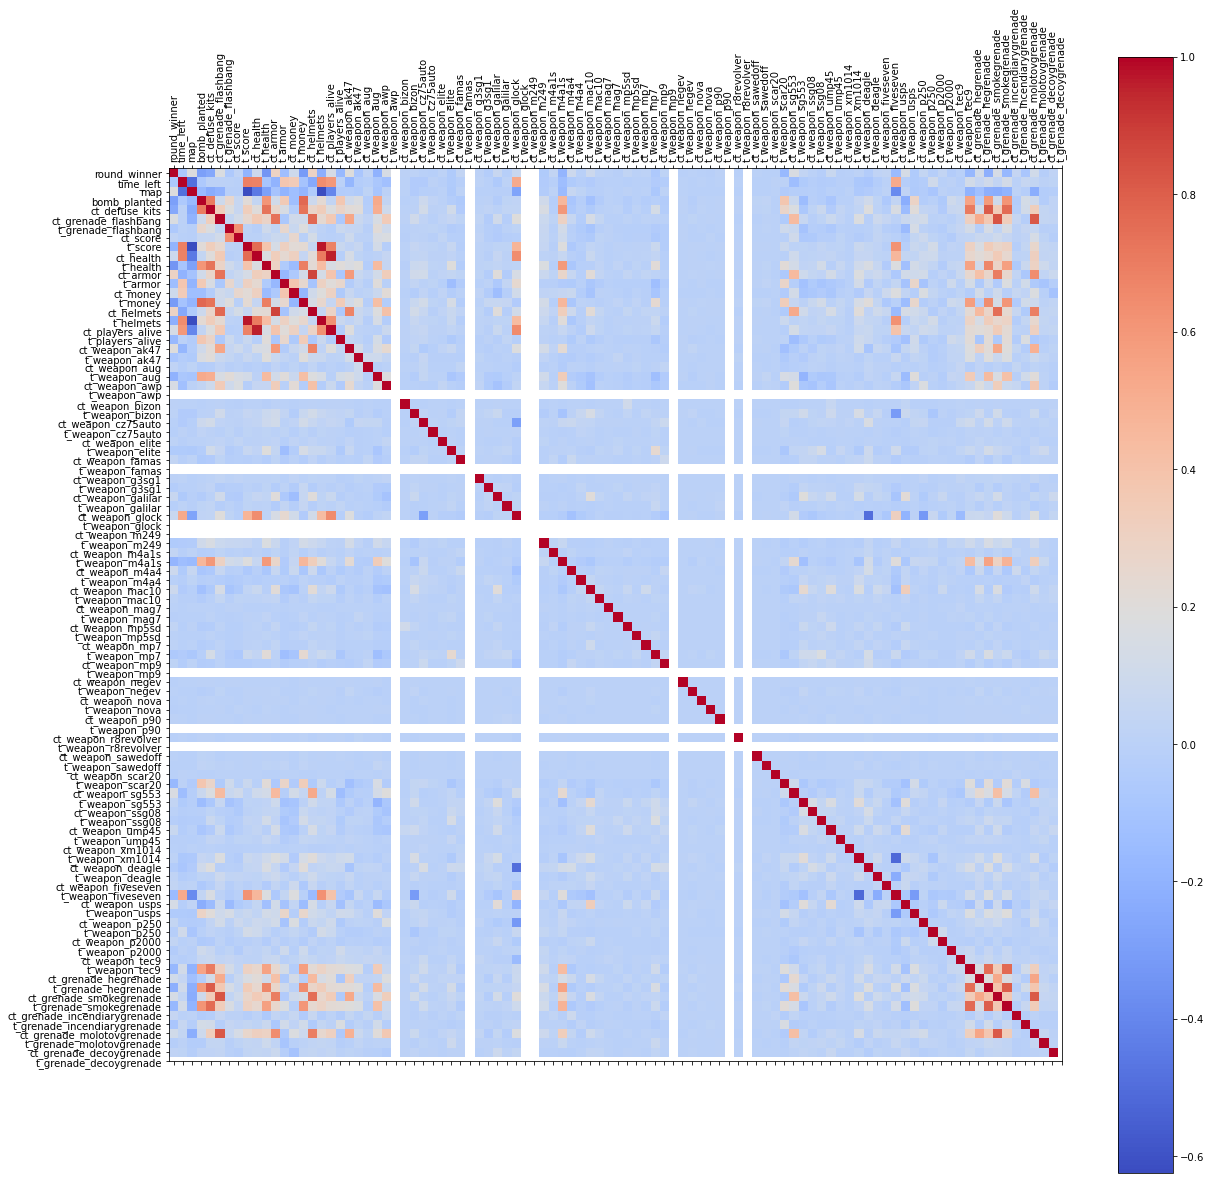

In [69]:
# Reviewing the correlations with a Matrix

f = plt.figure(figsize=(20, 20))
plt.matshow(df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

**delta_df dataframe**

In [70]:
# Checking the 'mi' of the new dataframe with deltas 'mi_dlt_df', with 'mi'>5%

mi_delta = mutual_info_classif(delta_df.drop(["round_winner", "map"], axis=1), delta_df.round_winner)
mi_dlt_df = pd.DataFrame(mi_delta,index=delta_df.iloc[:,np.r_[1, 3:len(delta_df.columns)]].columns, columns =['mi_score'])
mi_dlt_df[mi_dlt_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
delta_armor,0.189586
delta_helmets,0.125799
delta_players_alive,0.111414
delta_health,0.107248
delta_grenade_flashbang,0.071298
delta_grenade_smokegrenade,0.056599
ct_defuse_kits,0.052876


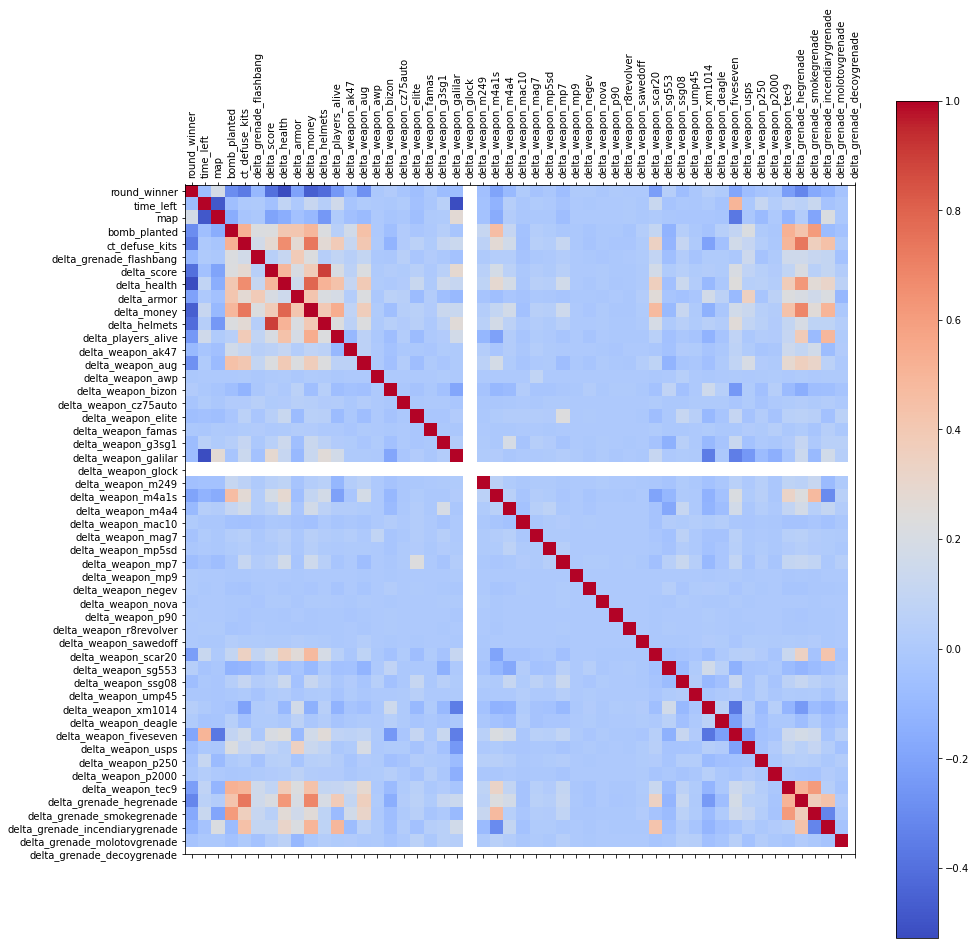

In [71]:
# Plot the correlations matrix of the deltas 'mi_dlt_df'

f = plt.figure(figsize=(15, 15))
plt.matshow(delta_df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(delta_df.shape[1]), delta_df.columns, fontsize=10, rotation=90)
plt.yticks(range(delta_df.shape[1]), delta_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

As we can see, the new deltas matrix has better features, in the term of predicting power

**weapcat_sum_df dataframe**

In [72]:
# Now we will check the 'mi' of the matrix: mi_wc_sum_df

mi_wc_sum = mutual_info_classif(weapcat_sum_df.drop(["round_winner", "map"], axis=1), weapcat_sum_df.round_winner)
mi_wc_sum_df = pd.DataFrame(mi_wc_sum,index=weapcat_sum_df.iloc[:,np.r_[1, 3:len(weapcat_sum_df.columns)]].columns, columns =['mi_score'])
mi_wc_sum_df[mi_wc_sum_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
t_armor,0.084142
ct_armor,0.076129
ct_Rifle,0.059322
t_Rifle,0.055658
ct_defuse_kits,0.052829
t_helmets,0.051154
ct_helmets,0.050703


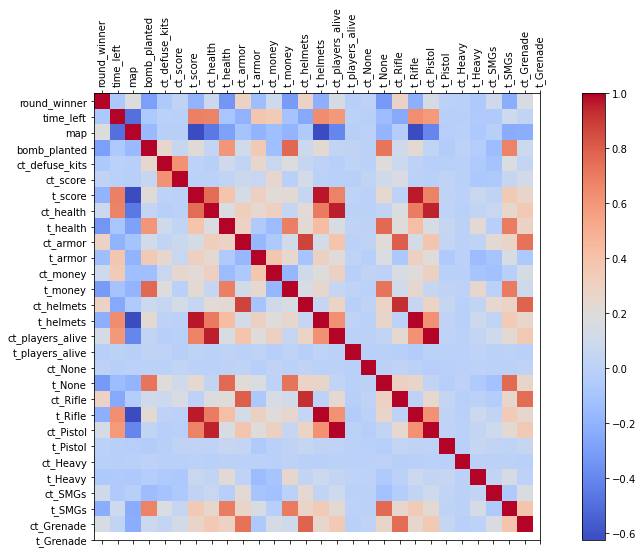

In [73]:
# Again, plotting the correlations matrix for easy visualizing

f = plt.figure(figsize=(15, 8))
plt.matshow(weapcat_sum_df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(weapcat_sum_df.shape[1]), weapcat_sum_df.columns, fontsize=10, rotation=90)
plt.yticks(range(weapcat_sum_df.shape[1]), weapcat_sum_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

**weapcat_deltaa_df dataframe**

In [74]:
# Same procedure to check 'mi' of the matrix: mi_wc_deltaa_df

mi_wc_deltaa = mutual_info_classif(weapcat_deltaa_df.drop(["round_winner", "map"], axis=1), weapcat_deltaa_df.round_winner)
mi_wc_deltaa_df = pd.DataFrame(mi_wc_deltaa,index=weapcat_deltaa_df.iloc[:,np.r_[1, 3:len(weapcat_deltaa_df.columns)]].columns, columns =['mi_score'])
mi_wc_deltaa_df[mi_wc_deltaa_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
delta_armor,0.188753
dlt_Rifle,0.159098
delta_helmets,0.123113
delta_players_alive,0.111973
dlt_Pistol,0.108606
delta_health,0.106415
dlt_Grenade,0.073317


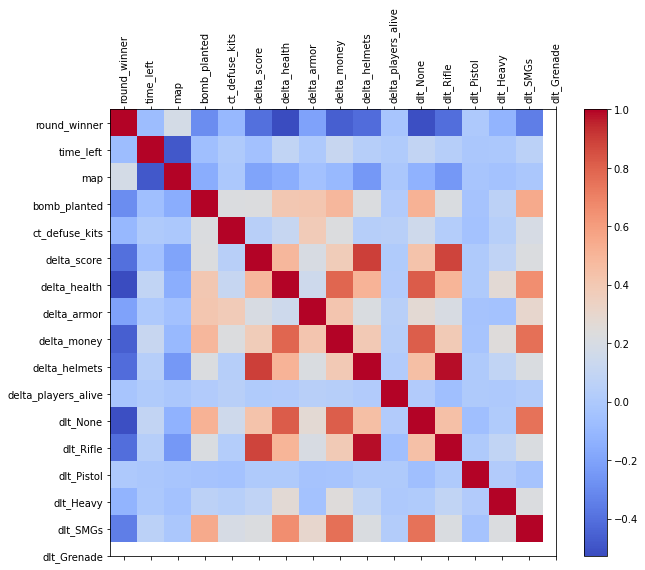

In [75]:
# Visualizing the correlation matrix

f = plt.figure(figsize=(10, 8))
plt.matshow(weapcat_deltaa_df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(weapcat_deltaa_df.shape[1]), weapcat_deltaa_df.columns, fontsize=10, rotation=90)
plt.yticks(range(weapcat_deltaa_df.shape[1]), weapcat_deltaa_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

**weapcat_deltas_df dataframe**

In [76]:
# Again with 'mi_wc_deltas_df'

mi_wc_deltas = mutual_info_classif(weapcat_deltas_df.drop(["round_winner", "map"], axis=1), weapcat_deltas_df.round_winner)
mi_wc_deltas_df = pd.DataFrame(mi_wc_deltas,index=weapcat_deltas_df.iloc[:,np.r_[1, 3:len(weapcat_deltas_df.columns)]].columns, columns =['mi_score'])
mi_wc_deltas_df[mi_wc_deltas_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
delta_armor,0.188428
dlt_Rifle,0.158447
delta_helmets,0.123707
delta_players_alive,0.113905
delta_health,0.107487
dlt_Pistol,0.100336
dlt_Grenade,0.072885
ct_defuse_kits,0.053139


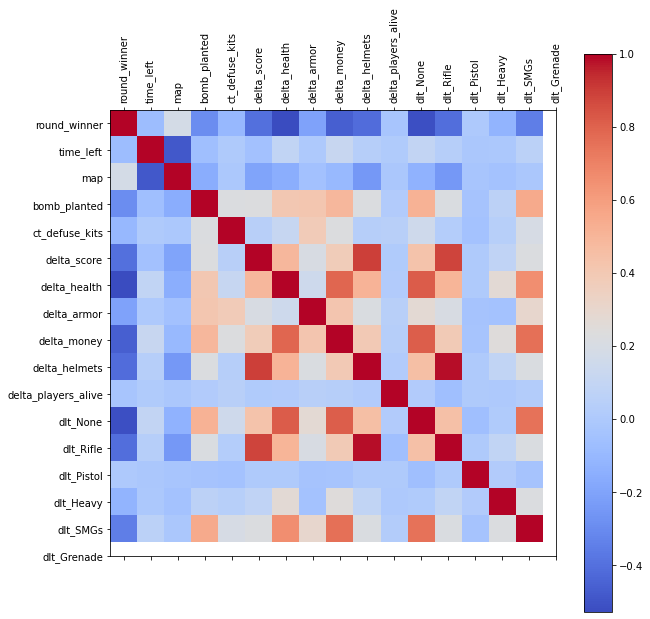

In [77]:
# Visualizing correlation matrix of 'mi_wc_deltas_df'

f = plt.figure(figsize=(10, 10))
plt.matshow(weapcat_deltas_df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(weapcat_deltas_df.shape[1]), weapcat_deltas_df.columns, fontsize=10, rotation=90)
plt.yticks(range(weapcat_deltas_df.shape[1]), weapcat_deltas_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

### 3.2.3. PCA analysis
<a id='3.2.3.'></a>

We will perform the following PCA analysis:
    
    3.2.3.1. Perform PCA on weapon variables (Standardised)
    3.2.3.2. Perform PCA on all variables (Standardised)
    3.2.3.3. Perform PCA on delta of weapon variables (standardised)
    3.2.3.4. Perform PCA on delta of weapon variables + variables without delta (standardised)
    3.2.3.5. Perform PCA on delta of weapon variables grouped by category  +  variables not grouped (Standardised)

#### 3.2.3.1. Perform PCA on weapon variables (Standardised)

In [439]:
df_input = df.iloc[:,15:] #take all weapon variables

In [440]:
df_input.head(2)

,ct_helmets,t_helmets,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,4.0,5.0,4.0,5.0,2.0,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0
1,0.0,4.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [441]:
pca = PCA(0.9) #define percentage of variance that we want to explain

In [442]:
X_temp = df_input.values # We do not take the class label
X = StandardScaler().fit_transform(X_temp) # normalizing the features

In [443]:
pca.fit(X) #fit the pca

PCA(n_components=0.9)

In [444]:
pca.n_components_ #show number of principal components created

57

In [445]:
df_pca = pca.transform(X) #create array with PC values

In [446]:
col = list(range(1,58)) #create columns for the df

In [447]:
principalDf = pd.DataFrame(data = df_pca
             , columns = col) #put the values of PC into a df

In [448]:
principalDf.head(2)

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,2.417955,1.105407,1.691514,-0.019985,-3.857425,-0.641458,4.642722,2.369452,-2.008004,-1.525928,...,0.635405,0.680863,-1.744785,-0.168284,-0.573342,-0.016219,0.708184,-1.057779,-0.367947,1.411423
1,-0.608211,1.161195,-1.146756,-0.733493,1.803071,0.830754,0.079510,1.273826,0.774725,-0.590696,...,0.256240,0.200264,-0.514639,-0.060825,0.163467,-0.199083,0.100260,0.282987,0.525513,0.330919


In [449]:
#pca.explained_variance_ratio_.sort() #show the percentage of the variance explained by each PC
pca.explained_variance_ratio_ 

array([0.07459432, 0.0443772 , 0.03514111, 0.02992646, 0.02631336,
       0.01920952, 0.0185023 , 0.01834504, 0.01592277, 0.01564375,
       0.01495075, 0.01441466, 0.01426252, 0.01409007, 0.01396108,
       0.01383882, 0.0138106 , 0.01376729, 0.0136659 , 0.01364326,
       0.01359404, 0.01356531, 0.01350015, 0.01345425, 0.01341111,
       0.01339067, 0.01335133, 0.01334168, 0.01332478, 0.01330637,
       0.01325239, 0.01323178, 0.01319496, 0.0131659 , 0.01309138,
       0.01297946, 0.01291941, 0.01287279, 0.01275401, 0.0127164 ,
       0.01263568, 0.0124795 , 0.01236539, 0.01229999, 0.01213685,
       0.0120127 , 0.01193864, 0.01180114, 0.01172498, 0.0114688 ,
       0.01140998, 0.01134805, 0.01123925, 0.01109305, 0.01086612,
       0.01067615, 0.01040003])

In [450]:
# Check the correlation between each PC and the target variable, sorting the values as absolute

principalDf.iloc[:,1:].corrwith(df.iloc[:, 0]).abs().sort_values(ascending=False).head(10)  #check the correlation between each PC and the target variable

2     0.423368
4     0.105344
3     0.055153
9     0.054323
45    0.052162
8     0.047411
5     0.047334
37    0.043535
35    0.039923
52    0.036500
dtype: float64

In [451]:
df_map_pca = pd.concat([df.iloc[:,0], principalDf.iloc[:,0:]], axis = 1)
df_map_pca.head()

,round_winner,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0,2.417955,1.105407,1.691514,-0.019985,-3.857425,-0.641458,4.642722,2.369452,-2.008004,...,0.635405,0.680863,-1.744785,-0.168284,-0.573342,-0.016219,0.708184,-1.057779,-0.367947,1.411423
1,1,-0.608211,1.161195,-1.146756,-0.733493,1.803071,0.830754,0.079510,1.273826,0.774725,...,0.256240,0.200264,-0.514639,-0.060825,0.163467,-0.199083,0.100260,0.282987,0.525513,0.330919
2,1,3.389749,-2.905312,-0.396312,0.845186,-2.264634,0.703248,2.381534,2.003785,0.223092,...,-0.019996,-1.182541,-0.082698,0.308278,0.241456,0.544687,0.263555,-0.797054,-1.524536,-0.428460
3,0,3.033188,-0.225456,-1.718900,-0.508447,0.568306,-0.626989,-0.029483,-1.003421,-0.112867,...,-0.172250,0.080574,0.045716,-0.069341,-0.207233,0.275627,0.360064,0.014092,0.198538,-0.611324
4,1,-2.405345,-0.230083,-2.390830,1.361087,-0.654890,-0.037418,0.074520,-0.325374,-0.957202,...,-0.417682,-1.042327,-0.240369,0.040826,0.305657,-0.522488,-0.440051,-0.506161,-0.398614,0.713016


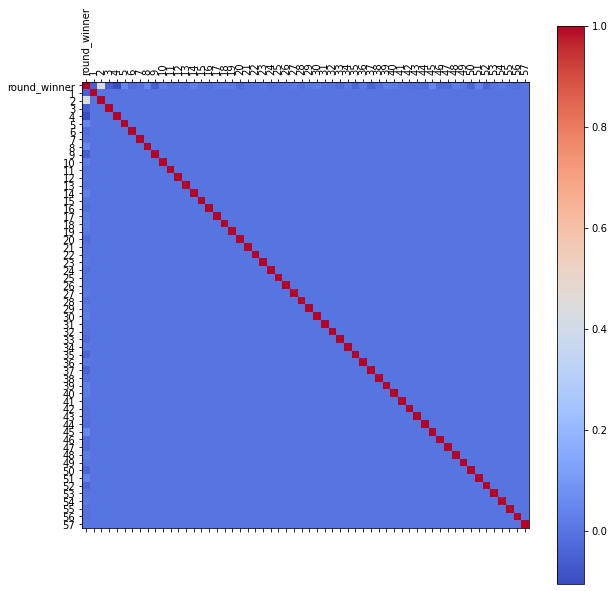

In [452]:
# Plot the pca result

f = plt.figure(figsize=(10, 10))
plt.matshow(df_map_pca.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(df_map_pca.shape[1]), df_map_pca.columns, fontsize=10, rotation=90)
plt.yticks(range(df_map_pca.shape[1]), df_map_pca.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [453]:
# Analyzing 'mi' with the pca results and the target variable

mi_pca = mutual_info_classif(df_map_pca.drop(["round_winner"], axis=1), df_map_pca.round_winner)
mi_pca_df = pd.DataFrame(mi_pca,index=df_map_pca.iloc[:,1:].columns, columns =['mi_score'])
mi_pca_df[mi_pca_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
2,0.148768
4,0.059558
27,0.054805
37,0.051877
20,0.050968


#### 3.2.3.2. Perform PCA on all variables (Standardised)

In [454]:
df_input = pd.concat([df.iloc[:,1], df.iloc[:,3:]], axis = 1)
df_input.head(2)

,time_left,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,t_health,ct_armor,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,94.96,0.0,4.0,3.0,5.0,11.0,2.0,392.0,500.0,379.0,...,0.0,0.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0
1,175.00,0.0,0.0,0.0,3.0,13.0,9.0,500.0,500.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [455]:
pca = PCA(0.9) #define percentage of variance that we want to explain

In [456]:
X_temp = df_input.values # We do not take the class label
X = StandardScaler().fit_transform(X_temp) # normalizing the features

In [457]:
pca.fit(X) #fit the pca

PCA(n_components=0.9)

In [458]:
pca.n_components_ #show number of principal components created

61

In [459]:
df_pca = pca.transform(X) #create array with PC values

In [460]:
col = list(range(1,62)) #create columns for the df

In [461]:
principalDf = pd.DataFrame(data = df_pca
             , columns = col) #put the values of PC into a df

In [462]:
principalDf.head(2)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,3.176769,1.447567,0.951130,0.286117,4.414255,-1.754254,-0.431298,1.864554,4.911601,0.338591,...,-1.000538,-0.550254,1.576516,-0.892972,-0.836447,-0.730398,-1.735002,0.048145,1.100543,0.048388
1,-0.448566,-0.020902,-3.355539,-2.359450,-0.328105,3.046626,0.002539,-0.017522,0.896791,-0.367700,...,0.022570,-0.474219,0.290432,0.314978,-0.092434,-0.195059,-0.100659,0.577435,0.455448,-1.741642


In [463]:
pca.explained_variance_ratio_.sort() #show the percentage of the variance explained by each PC
print('variance expl: ' + str(round(min(pca.explained_variance_ratio_),5))+ ' - ' +str(round(max(pca.explained_variance_ratio_),5)))

variance expl: 0.00878 - 0.09856


In [464]:
principalDf.iloc[:,1:].corrwith(df.iloc[:, 0]).sort_values() #check the correlation between each PC and the target variable

3    -0.253066
4    -0.090376
20   -0.049363
50   -0.043333
60   -0.034225
46   -0.031641
17   -0.031224
61   -0.031171
47   -0.030815
7    -0.030373
14   -0.028330
23   -0.025428
54   -0.023090
59   -0.020821
38   -0.018584
53   -0.018192
34   -0.016741
24   -0.016271
21   -0.013737
39   -0.012692
48   -0.011566
27   -0.011485
51   -0.010535
42   -0.010277
15   -0.006649
30   -0.002298
29   -0.000962
12    0.000229
35    0.000659
26    0.002904
11    0.016937
6     0.019513
55    0.020961
32    0.021196
9     0.022592
22    0.023675
31    0.024450
33    0.025514
58    0.027020
28    0.027070
5     0.029033
41    0.029080
40    0.030337
18    0.032259
56    0.036024
36    0.041261
49    0.043990
19    0.044827
45    0.044853
43    0.045119
25    0.047502
37    0.053620
44    0.057859
57    0.065500
52    0.070405
8     0.070706
13    0.089062
16    0.100006
10    0.117659
2     0.385942
dtype: float64

In [465]:
a =  principalDf.iloc[:,1:].corrwith(df.iloc[:, 0]).sort_values()
print('correlation: ' + str(round(min(a),5))+ ' - ' +str(round(max(a),5)))
del(a)

correlation: -0.25307 - 0.38594


#### 3.2.3.3. Perform PCA on delta of weapon variables (standardised)

In [536]:
df_input = delta_df.iloc[:,np.r_[5, 10:len(delta_df.columns)]]
df_input.head(2)

,delta_grenade_flashbang,delta_helmets,delta_players_alive,delta_weapon_ak47,delta_weapon_aug,delta_weapon_awp,delta_weapon_bizon,delta_weapon_cz75auto,delta_weapon_elite,delta_weapon_famas,...,delta_weapon_fiveseven,delta_weapon_usps,delta_weapon_p250,delta_weapon_p2000,delta_weapon_tec9,delta_grenade_hegrenade,delta_grenade_smokegrenade,delta_grenade_incendiarygrenade,delta_grenade_molotovgrenade,delta_grenade_decoygrenade
0,-2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,1.0,-3.0,-1.0
1,-3.0,-4.0,0.0,-3.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,-1.0,0.0,0.0,-1.0,-2.0,0.0,-1.0,0.0


In [537]:
X = df_input.values # We do not take the class label
X_std = StandardScaler().fit_transform(X) # normalizing the features

In [538]:
pca = PCA(0.9) #define percentage of variance that we want to explain

In [539]:
pca.fit(X_std) #fit the pca

PCA(n_components=0.9)

In [540]:
pca.n_components_ #show number of principal components created

31

In [541]:
df_pca = pca.transform(X_std) #create array with PC values

In [542]:
col = list(range(1,df_pca.shape[1]+1)) #create columns for the df

In [543]:
principalDf = pd.DataFrame(data = df_pca
             , columns = col) #put the values of PC into a df
principalDf.head(2)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,-2.446792,-0.087037,3.267176,-1.703505,-0.548711,-0.391061,0.82211,-0.935548,-1.011304,1.362072,...,1.617497,2.037557,-1.882058,3.562974,1.505282,0.371677,-1.300452,-0.215745,0.840188,1.263235
1,-2.163815,-0.596088,-2.636609,0.059209,0.795148,0.224916,0.41183,-0.907786,0.496104,0.103790,...,0.237655,0.164343,-0.724431,-0.086557,-0.065363,-0.496379,0.993529,0.291936,0.257561,0.802267


In [544]:
pca.explained_variance_ratio_ #show the percentage of the variance explained by each PC

array([0.10765477, 0.05967155, 0.04528556, 0.03517418, 0.03301377,
       0.02818936, 0.02791532, 0.02657578, 0.02632223, 0.02594649,
       0.02492255, 0.02480627, 0.02464327, 0.02458275, 0.02445136,
       0.02441955, 0.02438353, 0.02431578, 0.0242022 , 0.02415159,
       0.02387967, 0.02362997, 0.02328058, 0.02273138, 0.022616  ,
       0.02235852, 0.02185862, 0.02151683, 0.02118988, 0.02065652,
       0.01937727])

In [545]:
principalDf.iloc[:,2].corr(df.iloc[:, 0]) #check the correlation between each PC and the target variable

-0.06876695627070921

In [546]:
pca.explained_variance_ratio_.sort() #show the percentage of the variance explained by each PC
print('variance expl: ' + str(round(min(pca.explained_variance_ratio_),5))+ ' - ' +str(round(max(pca.explained_variance_ratio_),5)))

a =  principalDf.iloc[:,1:].corrwith(df.iloc[:, 0]).sort_values()
print('correlation: ' + str(round(min(a),5))+ ' - ' +str(round(max(a),5)))
del(a)

variance expl: 0.01938 - 0.10765
correlation: -0.21854 - 0.15795


#### 3.2.3.4. Perform PCA on delta of weapon variables + variables without delta (standardised)

In [ ]:
df_input = pd.concat([delta_df.iloc[:,1], delta_df.iloc[:,3:]], axis = 1)

In [ ]:
X = df_input.values # We do not take the class label
X_std = StandardScaler().fit_transform(X) # normalizing the features

In [ ]:
pca = PCA(0.9) #define percentage of variance that we want to explain

In [550]:
pca.fit(X_std) #fit the pca

PCA(n_components=0.9)

In [551]:
pca.n_components_ #show number of principal components created

34

In [552]:
df_pca = pca.transform(X_std) #create array with PC values

In [553]:
col = list(range(1,df_pca.shape[1]+1)) #create columns for the df
#col

In [554]:
principalDf = pd.DataFrame(data = df_pca
             , columns = col) #put the values of PC into a df
principalDf.head(2)

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,-1.387736,0.774338,4.552253,-1.963993,-0.976238,-0.227399,-1.076459,0.322485,0.072271,-2.102843,...,4.216600,-1.395728,0.531846,1.565546,0.007135,-0.284286,0.062422,1.240262,2.273507,-0.717995
1,-2.838639,-0.130787,-2.441022,-0.547712,-0.107556,-0.796148,0.138822,1.871684,-0.262553,0.051878,...,0.609386,-0.519940,-0.560096,0.095155,1.344484,0.386556,0.901962,0.814181,-0.989396,-0.286050


In [555]:
pca.explained_variance_ratio_ #show the percentage of the variance explained by each PC

array([0.12223161, 0.05801935, 0.04756882, 0.04440394, 0.04008588,
       0.02908244, 0.02659494, 0.02360238, 0.02284794, 0.0224936 ,
       0.02220329, 0.02158041, 0.02132813, 0.02117763, 0.0209539 ,
       0.02089979, 0.02085167, 0.02083108, 0.02077968, 0.02066293,
       0.02054244, 0.02046719, 0.02001476, 0.01995629, 0.01971788,
       0.01938688, 0.01876916, 0.01873329, 0.01829568, 0.01811584,
       0.01786516, 0.01661245, 0.0159818 , 0.01534615])

In [556]:
pca.explained_variance_ratio_.sort() #show the percentage of the variance explained by each PC
print('variance expl: ' + str(round(min(pca.explained_variance_ratio_),5))+ ' - ' +str(round(max(pca.explained_variance_ratio_),5)))

a =  principalDf.iloc[:,1:].corrwith(df.iloc[:, 0]).sort_values()
print('correlation: ' + str(round(min(a),5))+ ' - ' +str(round(max(a),5)))
del(a)

variance expl: 0.01535 - 0.12223
correlation: -0.20555 - 0.07813


#### 3.2.3.5. Perform PCA on delta of weapon variables grouped by category  +  variables not grouped (Standardised)

In [599]:
df_input = pd.concat([weapcat_deltaa_df.iloc[:,1], weapcat_deltaa_df.iloc[:,3:]], axis = 1)
df_input.head(2)

,time_left,bomb_planted,ct_defuse_kits,delta_score,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,dlt_None,dlt_Rifle,dlt_Pistol,dlt_Heavy,dlt_SMGs,dlt_Grenade
0,94.96,0.0,4.0,9.0,-108.0,-121.0,20800.0,-1.0,-1.0,0.0,0.000000,-0.111111,0.0,-0.142857,-1.333333
1,175.00,0.0,0.0,4.0,0.0,-300.0,-16200.0,-4.0,0.0,0.0,-0.363636,0.000000,0.0,0.000000,-1.166667


In [600]:
X = df_input.values # We do not take the class label
X_std = StandardScaler().fit_transform(X) # normalizing the features

In [601]:
pca = PCA(0.9) #define percentage of variance that we want to explain

In [602]:
pca.fit(X_std) #fit the pca

PCA(n_components=0.9)

In [603]:
pca.n_components_ #show number of principal components created

9

In [604]:
df_pca = pca.transform(X_std) #create array with PC values

In [605]:
col = list(range(1,df_pca.shape[1]+1)) #create columns for the df
#col

In [606]:
principalDf = pd.DataFrame(data = df_pca
             , columns = col) #put the values of PC into a df
principalDf.head(2)

,1,2,3,4,5,6,7,8,9
0,-0.875844,1.954449,-0.182192,-3.124494,-0.111512,0.736495,0.129565,-0.212895,0.695281
1,-2.403883,-1.479000,-1.137174,-0.898227,0.335677,0.051889,-1.020288,0.900644,0.572395


In [607]:
pca.explained_variance_ratio_ #show the percentage of the variance explained by each PC

array([0.33328507, 0.13403979, 0.09579761, 0.08516021, 0.06796244,
       0.06538158, 0.06424304, 0.04780392, 0.03852558])

In [608]:
pca_weapcat_deltaa_df = pd.concat([weapcat_deltaa_df.iloc[:,0],weapcat_deltaa_df.iloc[:,2], principalDf.iloc[:,0:]], axis = 1)
pca_weapcat_deltaa_df.head()

,round_winner,map,1,2,3,4,5,6,7,8,9
0,0,de_train,-0.875844,1.954449,-0.182192,-3.124494,-0.111512,0.736495,0.129565,-0.212895,0.695281
1,1,de_nuke,-2.403883,-1.479000,-1.137174,-0.898227,0.335677,0.051889,-1.020288,0.900644,0.572395
2,1,de_inferno,1.999035,1.418612,-1.317993,-0.156249,-0.234065,0.111264,0.152276,0.454759,-0.030400
3,0,de_inferno,0.025854,0.604020,-0.006717,0.287220,0.426861,0.228310,-0.981131,-1.411823,0.845528
4,1,de_nuke,-0.296898,-0.845180,-0.553591,1.143970,-0.469825,-0.439320,0.674782,-0.355674,-1.365515


In [208]:
pca_weapcat_deltaa_df.iloc[:,0:].corrwith(weapcat_deltaa_df.iloc[:, 0]).abs().sort_values(ascending=False) #check the correlation between each PC and the target variable

round_winner    1.000000
1               0.556603
4               0.042506
3               0.040407
9               0.030280
2               0.027609
7               0.021400
8               0.016052
6               0.011487
5               0.005928
dtype: float64

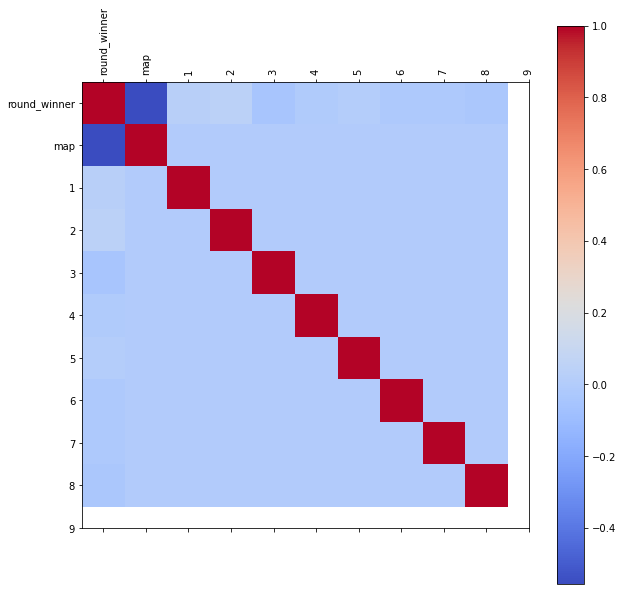

In [209]:
f = plt.figure(figsize=(10, 10))
plt.matshow(pca_weapcat_deltaa_df.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(pca_weapcat_deltaa_df.shape[1]), pca_weapcat_deltaa_df.columns, fontsize=10, rotation=90)
plt.yticks(range(pca_weapcat_deltaa_df.shape[1]), pca_weapcat_deltaa_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [210]:
mi_pca = mutual_info_classif(df_map_pca.drop(["round_winner"], axis=1), df_map_pca.round_winner)
mi_pca_df = pd.DataFrame(mi_pca,index=df_map_pca.iloc[:,1:].columns, columns =['mi_score'])
mi_pca_df[mi_pca_df['mi_score']>0.05].sort_values(by='mi_score', ascending=False)

,mi_score
2,0.148143
4,0.058774
27,0.054533
37,0.052672
20,0.051214


### 3.2.4. Transform categorical variables into dummy
<a id='3.2.4.'></a>

In order to transform categorical variables into dummy variables we used 'one-hot enconder'

In [225]:
# In order to transform categorical variables into dummy variables we used 'one-hot enconder'
# Create an one-hot encoder for map variables in the df dataframe

ohe = OneHotEncoder()

df['map'] = df.map.astype('category')
categorical_cols = df.columns[df.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(df[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True)

df = pd.concat([df, hot_enc], axis = 1)
df = df.drop(['map'], axis=1)

df.head(2)

,round_winner,time_left,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,t_health,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,3.0,5.0,11.0,2.0,392.0,500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,0.0,3.0,13.0,9.0,500.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# Create an one-hot encoder for map variables in the delta_df dataframe

ohe = OneHotEncoder()

delta_df['map'] = delta_df.map.astype('category')
categorical_cols = delta_df.columns[delta_df.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(delta_df[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True)

delta_df = pd.concat([delta_df, hot_enc], axis = 1)
delta_df = delta_df.drop(['map'], axis=1)

delta_df.head(2)

,round_winner,time_left,bomb_planted,ct_defuse_kits,delta_grenade_flashbang,delta_score,delta_health,delta_armor,delta_money,delta_helmets,...,delta_grenade_molotovgrenade,delta_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,-2.0,9.0,-108.0,-121.0,20800.0,-1.0,...,-3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,-3.0,4.0,0.0,-300.0,-16200.0,-4.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [394]:
weapcat_deltaa_df.head()

,round_winner,time_left,bomb_planted,ct_defuse_kits,delta_grenade_flashbang,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,delta_weapon_ak47,dlt_None,dlt_Rifle,dlt_Pistol,dlt_Heavy,dlt_SMGs,dlt_Grenade
0,0,94.96,0.0,4.0,-2.0,-108.0,-121.0,20800.0,-1.0,-1.0,-1.0,0.0,0.000000,-0.111111,0.0,-0.142857,-1.333333
1,1,175.00,0.0,0.0,-3.0,0.0,-300.0,-16200.0,-4.0,0.0,-3.0,0.0,-0.363636,0.000000,0.0,0.000000,-1.166667
2,1,175.00,0.0,3.0,2.0,0.0,198.0,4400.0,2.0,0.0,0.0,0.0,0.181818,0.000000,0.0,0.000000,1.500000
3,0,74.89,0.0,4.0,0.0,-50.0,9.0,-5650.0,-2.0,0.0,-2.0,0.0,-0.090909,0.000000,0.0,0.142857,0.333333
4,1,110.04,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.333333


In [609]:
# Create an one-hot encoder for map variables in the weapcat_deltaa_df dataframe

ohe = OneHotEncoder()

weapcat_deltaa_df['map'] = weapcat_deltaa_df.map.astype('category')
categorical_cols = weapcat_deltaa_df.columns[weapcat_deltaa_df.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(weapcat_deltaa_df[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True)

weapcat_deltaa_df = pd.concat([weapcat_deltaa_df, hot_enc], axis = 1)
weapcat_deltaa_df = weapcat_deltaa_df.drop(['map'], axis=1)

weapcat_deltaa_df.head(2)

,round_winner,time_left,bomb_planted,ct_defuse_kits,delta_score,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,...,dlt_SMGs,dlt_Grenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,9.0,-108.0,-121.0,20800.0,-1.0,-1.0,...,-0.142857,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,4.0,0.0,-300.0,-16200.0,-4.0,0.0,...,0.000000,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [610]:
# Create an one-hot encoder for map variables in the pca_weapcat_deltaa_df dataframe

ohe = OneHotEncoder()

pca_weapcat_deltaa_df['map'] = pca_weapcat_deltaa_df.map.astype('category')
categorical_cols = pca_weapcat_deltaa_df.columns[pca_weapcat_deltaa_df.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(pca_weapcat_deltaa_df[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True)

pca_weapcat_deltaa_df = pd.concat([pca_weapcat_deltaa_df, hot_enc], axis = 1)
pca_weapcat_deltaa_df = pca_weapcat_deltaa_df.drop(['map'], axis=1)

### 3.2.5. Output of 3. Transformation
<a id='3.2.5.'></a>

After the different analysis and transformations performed, we obtained 4 main dataset to test with the different models:

- **Original one 'df'**: All the original columns with map column with hot-encoder (Number of features = 104)
  
- **Deltas 'delta_df'**: Columns round winner,  time_left, map (encoded), bomb planted, ct_defuse_kits. Plus the delta columns (Number of features = 59)
  
- **Variable groups by category of guns 'weapcat_deltaa_df'**: Takes the weapon and grenade related variables, grouped them by category (rifle, pistol, etc), calculate de average and then calculate the difference between ct and t columns. Concatenated with the variables that are not weapon related (Number of features = 24)
  
- **Weapons category grouped + deltas + PCA 'pca_weapcat_deltaa_df'**: Standarize the weapcat_deltaa_df dataframe and run PCA analysis (Number of features = 18)

**Original 'df'**

In [229]:
df.shape

(81999, 104)

In [230]:
df.head()

,round_winner,time_left,bomb_planted,ct_defuse_kits,ct_grenade_flashbang,t_grenade_flashbang,ct_score,t_score,ct_health,t_health,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,3.0,5.0,11.0,2.0,392.0,500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,0.0,3.0,13.0,9.0,500.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,175.00,0.0,3.0,5.0,3.0,14.0,11.0,500.0,500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,74.89,0.0,4.0,4.0,4.0,12.0,11.0,439.0,489.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,110.04,0.0,0.0,0.0,0.0,3.0,12.0,500.0,500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Deltas 'delta_df'**

In [231]:
delta_df.shape

(81999, 58)

In [232]:
delta_df.head()

,round_winner,time_left,bomb_planted,ct_defuse_kits,delta_grenade_flashbang,delta_score,delta_health,delta_armor,delta_money,delta_helmets,...,delta_grenade_molotovgrenade,delta_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,-2.0,9.0,-108.0,-121.0,20800.0,-1.0,...,-3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,-3.0,4.0,0.0,-300.0,-16200.0,-4.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,175.00,0.0,3.0,2.0,3.0,0.0,198.0,4400.0,2.0,...,-2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,74.89,0.0,4.0,0.0,1.0,-50.0,9.0,-5650.0,-2.0,...,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,110.04,0.0,0.0,0.0,-9.0,0.0,100.0,50.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Variable groups by category of guns 'weapcat_deltaa_df'**

In [233]:
weapcat_deltaa_df.shape

(81999, 24)

In [234]:
weapcat_deltaa_df.head()

,round_winner,time_left,bomb_planted,ct_defuse_kits,delta_score,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,...,dlt_SMGs,dlt_Grenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,94.96,0.0,4.0,9.0,-108.0,-121.0,20800.0,-1.0,-1.0,...,-0.142857,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,175.00,0.0,0.0,4.0,0.0,-300.0,-16200.0,-4.0,0.0,...,0.000000,-1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,175.00,0.0,3.0,3.0,0.0,198.0,4400.0,2.0,0.0,...,0.000000,1.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,74.89,0.0,4.0,1.0,-50.0,9.0,-5650.0,-2.0,0.0,...,0.142857,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,110.04,0.0,0.0,-9.0,0.0,100.0,50.0,0.0,0.0,...,0.000000,-0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Weapons category grouped + deltas + PCA 'pca_weapcat_deltaa_df'**

In [235]:
pca_weapcat_deltaa_df.shape

(81999, 18)

In [236]:
pca_weapcat_deltaa_df.head()

,round_winner,1,2,3,4,5,6,7,8,9,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,-0.875844,1.954449,-0.182192,-3.124494,-0.111512,0.736495,0.129565,-0.212895,0.695281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,-2.403883,-1.479000,-1.137174,-0.898227,0.335677,0.051889,-1.020288,0.900644,0.572395,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1.999035,1.418612,-1.317993,-0.156249,-0.234065,0.111264,0.152276,0.454759,-0.030400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0.025854,0.604020,-0.006717,0.287220,0.426861,0.228310,-0.981131,-1.411823,0.845528,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,-0.296898,-0.845180,-0.553591,1.143970,-0.469825,-0.439320,0.674782,-0.355674,-1.365515,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### [Get back](#tc)

# 4. Model data
<a id='4'></a>

### 4.0. Create a baseline

In [630]:
weapcat_deltaa_df2 = weapcat_deltaa_df.copy()

In [314]:
weapcat_deltaa_df.groupby(['round_winner'])['round_winner'].count()

round_winner
0    40115
1    41884
Name: round_winner, dtype: int64

In [315]:
weapcat_deltaa_df['armor_bins'] = pd.cut(weapcat_deltaa_df['delta_armor'], bins=[-500,-400,-300,-200,-100,0,100,200,300,400,500], labels=['-500','-400','-300','-200','-100','0','100','200','300','400']).astype('category')

armor_1 = weapcat_deltaa_df[weapcat_deltaa_df['delta_armor']<100].groupby(['armor_bins','round_winner'])['armor_bins'].count().unstack()
armor = pd.DataFrame(armor_1, index = armor_1.index)
armor.rename(columns={0: 'ct', 1:'t'}, inplace=True)

In [316]:
weapcat_deltaa_df['money_bins'] = pd.cut(weapcat_deltaa_df['delta_money'], bins=[-70000,-60000,-50000,-40000,-30000,-20000,-10000,0,10000,20000,30000,40000,50000,60000,70000], labels=[-70000,-60000,-50000,-40000,-30000,-20000,-10000,0,10000,20000,30000,40000,50000,60000]).astype('category')

money_1 = weapcat_deltaa_df[weapcat_deltaa_df['delta_armor']<100].groupby(['money_bins','round_winner'])['delta_money'].count().unstack()
money = pd.DataFrame(money_1, index = money_1.index)
money.rename(columns={0: 'ct', 1:'t'}, inplace=True)

In [317]:
weapcat_deltaa_df['time_bin'] = pd.cut(weapcat_deltaa_df['time_left'], bins=[-5,15,35,55,75,95,115,135,155,175], labels=[15,35,55,75,95,115,135,155,175]).astype('category')

time_left_1 = weapcat_deltaa_df[(weapcat_deltaa_df['delta_armor']<100) & (weapcat_deltaa_df['delta_money']>0)].groupby(['time_bin','round_winner'])['time_bin'].count().unstack()
time_left = pd.DataFrame(time_left_1, index = time_left_1.index)
time_left.rename(columns={0: 'ct', 1:'t'}, inplace=True)


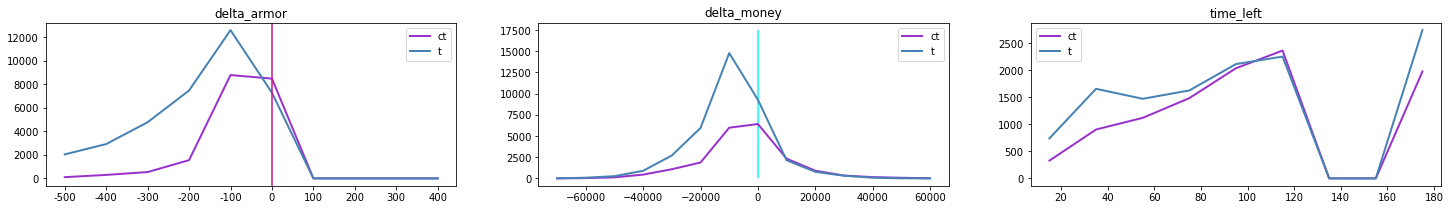

In [318]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25, 3))

ax1.plot( armor.index, 'ct', data=armor,  color='darkorchid', linewidth=2)
ax1.plot( armor.index, 't', data=armor,  color='steelblue',  linewidth=2)
ax1.set_title('delta_armor')
ax1.axvline(x = 5, ymin=0, ymax=15000, color='mediumvioletred')
ax1.legend()

# if delta_armor > 100 then round winner = ct

ax2.plot( money.index, 'ct', data=money,  color='darkorchid', linewidth=2)
ax2.plot( money.index, 't', data=money,  color='steelblue', linewidth=2)
ax2.set_title('delta_money')
ax2.vlines(x=0, ymin=0, ymax=17500, color='cyan')

ax2.legend()

ax3.plot( time_left.index, 'ct', data=time_left,  color='darkorchid', linewidth=2)
ax3.plot( time_left.index, 't', data=time_left,  color='steelblue', linewidth=2)
ax3.set_title('time_left')
ax3.legend()


#if delta_money<0 then round_winner = 'tw'

In [319]:
threshold = 0

row_indexes=weapcat_deltaa_df[(weapcat_deltaa_df['delta_armor']>=threshold)].index
weapcat_deltaa_df.loc[row_indexes,'rw_predicted']=0

row_indexes=weapcat_deltaa_df[(weapcat_deltaa_df['delta_armor']<threshold)].index
weapcat_deltaa_df.loc[row_indexes,'rw_predicted']=1

In [320]:
#The accuracy of the model is basically the total number of correct predictions divided by total number of predictions. 
weapcat_deltaa_df['predicted_test'] =  np.where(weapcat_deltaa_df['round_winner'] == weapcat_deltaa_df['rw_predicted'], True, False)
accuracy = weapcat_deltaa_df['predicted_test'].sum()/weapcat_deltaa_df['predicted_test'].count()
accuracy

0.717252649422554

We created a baseline model based on a business rule in order to have a baseline accuracy measure that we will use to evaluate and compare the prediction accuracy generated by more advanced machine learning techniques.

#### [Get back](#tc)

## 4.1. Testing dataset: df = original dataset
<a id='4.1.'></a>

In [104]:
# Uncomment the desired dataset for modelling:

df_mod = df.copy()   
# df_mod = delta_df.copy()
# df_mod = weapcat_deltaa_df.copy()
# df_mod = pca_weapcat_deltaa_df.copy()

In [105]:
# Define the function to split the dataset into train-test 
def split_df(dataframe, seed=None, percentage=0.7):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return train_test_split(X, y, test_size=1-percentage, random_state=42)

In [106]:
# Before starting we split the dataset

X_train, X_test, y_train, y_test = split_df(df_mod)

In [107]:
# Define the function to split the dataset into train-test 

def split_df_x_y(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return X, y

In [108]:
# Before starting we split the dataset

X, y = split_df_x_y(df_mod)

We split the dataframe in X and y and in 'train' and 'test' because some algorithms do not provide the validation score.
For those algorithms and methods that do provide the validation score we will use the full dataset (extracting the validation score)

### 4.1.1. Logistic regression model

#### 4.1.1.1. Pure logistic regression

In [46]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter=100, solver='liblinear')
model.fit(X_train, y_train) #fit log regression on train data

LogisticRegression(solver='liblinear')

In [47]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,model.predict(X_test))))

Accuracy = 0.7500


#### 4.1.1.2. Logistic regression with cross-validation and 'Ridge' regularization

In [48]:
# Ridge

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

ridge_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l2',Cs=alphas, n_jobs=6).fit(X_train, y_train)

Accuracy = 0.7460


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


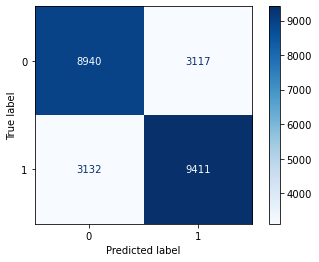

In [49]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,ridge_mod_cv.predict(X_test))))
plot_confusion_matrix(ridge_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

#### 4.1.1.3. Logistic regression with cross-validation and 'Lasso' Regularization**

In [244]:
# Lasso

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

lasso_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l1',solver='liblinear',Cs=alphas, n_jobs = 6, verbose = 1).fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed: 11.1min finished


Accuracy = 0.7506


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


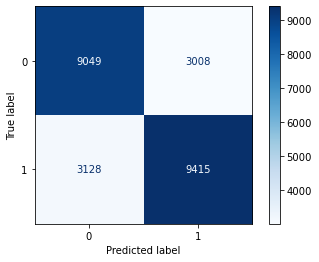

In [245]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,lasso_mod_cv.predict(X_test))))
plot_confusion_matrix(lasso_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

### 4.1.2. Decision Tree Classifier models

#### 4.1.2.1. One decision tree

In [52]:
df_treec = DecisionTreeClassifier(random_state=42)
df_treec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.7916


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


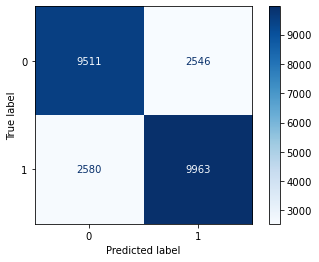

In [53]:
predictions = df_treec.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,df_treec.predict(X_test))))
plot_confusion_matrix(df_treec, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

In [54]:
# Casting the columns into string before ploting

X_train.columns = X_train.columns.map(str)

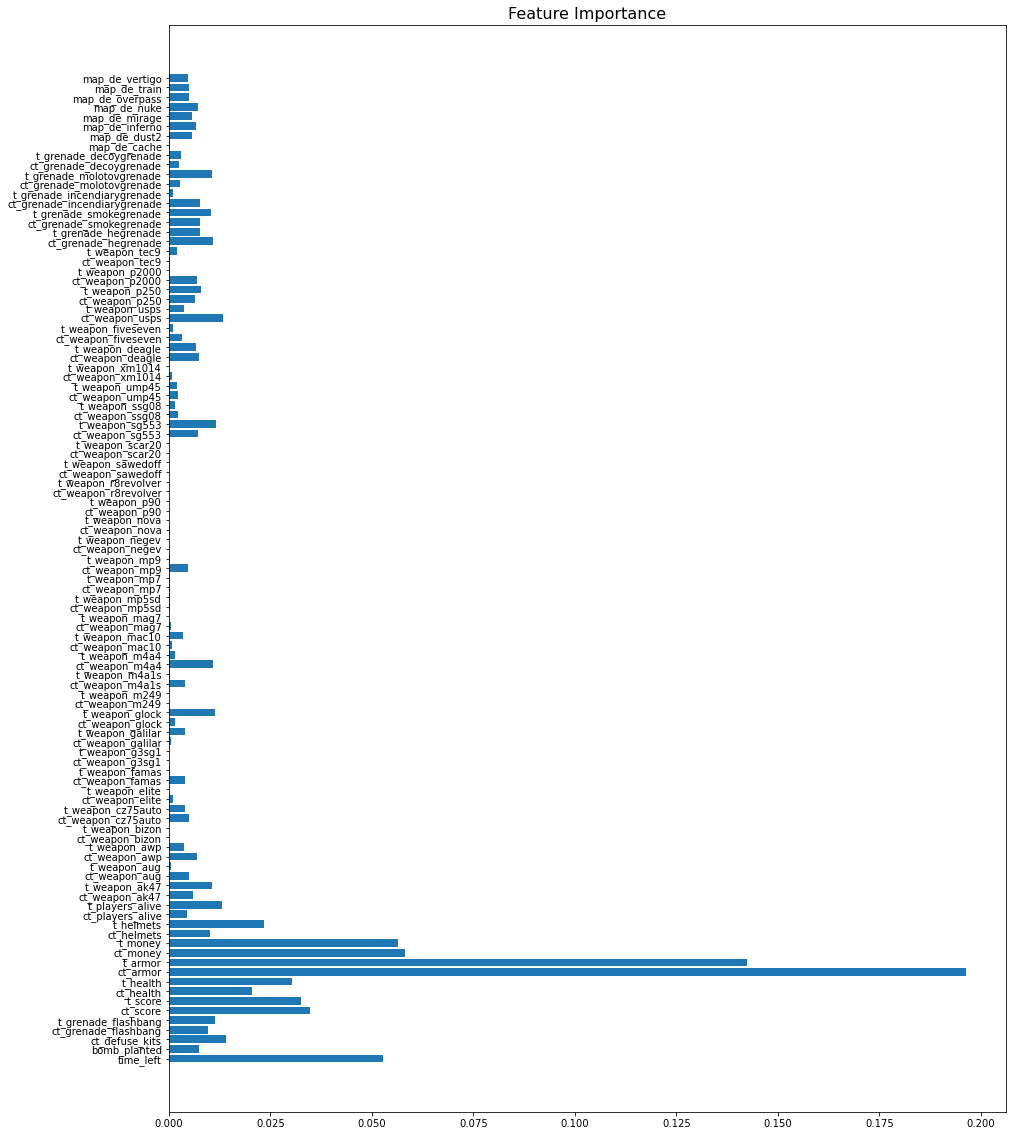

In [57]:
# Plotting the feature importance

plt.figure(figsize=(15,20))
plt.barh(X_train.columns, df_treec.feature_importances_)
plt.title('Feature Importance', fontsize=16);

Now we will try to improve the accuracy fine-tuning the hyperparameters with GridSearch

In [59]:
param_grid = {'max_depth': range(1,60)}

df_treec_pruned_cv = GridSearchCV(df_treec, 
                   param_grid,
                   scoring='accuracy',
                   cv=10 , n_jobs= 6, verbose=1)

df_treec_pruned_cv.fit(X,y)
print("Best score found on development set:")
print()
print(df_treec_pruned_cv.best_score_)
print("Best parameters set found on development set:")
print()
print(df_treec_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = df_treec_pruned_cv.cv_results_['mean_test_score']
stds = df_treec_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, df_treec_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 10 folds for each of 59 candidates, totalling 590 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 590 out of 590 | elapsed:  8.5min finished


Best score found on development set:

0.8040220193420377
Best parameters set found on development set:

{'max_depth': 37}

Grid scores on development set:

Accuracy = 0.643 (+/0.006) for {'max_depth': 1}
Accuracy = 0.677 (+/0.009) for {'max_depth': 2}
Accuracy = 0.711 (+/0.008) for {'max_depth': 3}
Accuracy = 0.731 (+/0.007) for {'max_depth': 4}
Accuracy = 0.737 (+/0.008) for {'max_depth': 5}
Accuracy = 0.750 (+/0.011) for {'max_depth': 6}
Accuracy = 0.750 (+/0.010) for {'max_depth': 7}
Accuracy = 0.753 (+/0.010) for {'max_depth': 8}
Accuracy = 0.756 (+/0.010) for {'max_depth': 9}
Accuracy = 0.759 (+/0.011) for {'max_depth': 10}
Accuracy = 0.761 (+/0.009) for {'max_depth': 11}
Accuracy = 0.764 (+/0.011) for {'max_depth': 12}
Accuracy = 0.767 (+/0.011) for {'max_depth': 13}
Accuracy = 0.770 (+/0.009) for {'max_depth': 14}
Accuracy = 0.774 (+/0.012) for {'max_depth': 15}
Accuracy = 0.776 (+/0.011) for {'max_depth': 16}
Accuracy = 0.779 (+/0.012) for {'max_depth': 17}
Accuracy = 0.783 (+/

In [62]:
means

array([0.64314203, 0.67732526, 0.71106971, 0.73109424, 0.73683823,
       0.74953357, 0.75046041, 0.75296038, 0.75577755, 0.7589239 ,
       0.76115564, 0.76448493, 0.76727766, 0.76978986, 0.77380211,
       0.77625336, 0.77880218, 0.78277782, 0.78563152, 0.78774135,
       0.79122916, 0.79296091, 0.7942902 , 0.79507071, 0.79747316,
       0.80002197, 0.79968051, 0.80085125, 0.80083908, 0.80219276,
       0.80100978, 0.80344885, 0.80221706, 0.80294883, 0.80330248,
       0.80227807, 0.80402202, 0.80399766, 0.80341225, 0.80359517,
       0.80286345, 0.80291226, 0.80308296, 0.80368054, 0.80293662,
       0.80215617, 0.80276588, 0.80204639, 0.80249761, 0.80220493,
       0.80209517, 0.80211956, 0.80222932, 0.80248541, 0.80248541,
       0.80248541, 0.80248541, 0.80248541, 0.80248541])

Text(0, 0.5, 'Accuracy')

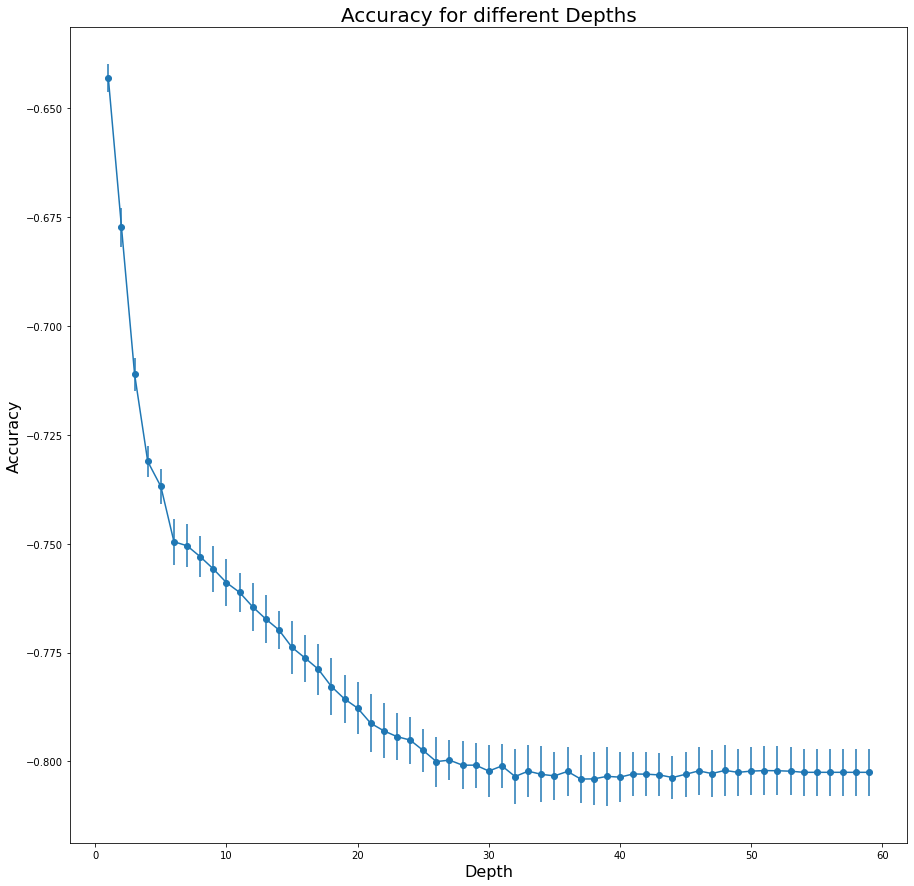

In [63]:
plt.figure(figsize=(15,15))
plt.errorbar(range(1,60,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

#### 4.1.2.2. Bagging

In [69]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, n_jobs = 6, verbose = 1)
bag_model=bag_model.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   48.4s remaining:   48.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   48.5s finished


In [70]:
y_test_pred=bag_model.predict(X_test)

print(bag_model.score(X_test, y_test))

# print(confusion_matrix(y_test, y_test_pred)) 

#sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap=plt.cm.Blues)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.8460569105691057


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished


#### 4.1.2.3. Random Forest Classifier with default parameters

In [67]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8519105691056911


In [370]:
#Setting model parameters
#number of trees
n_estimators = [100]


In [371]:
model_params = {
    
    'n_estimators': n_estimators
    
}

In [372]:
clf=RandomForestClassifier(n_estimators=100)

estimator = GridSearchCV(clf, param_grid=model_params, cv=5, verbose=1, n_jobs=6, return_train_score=True, scoring = 'accuracy')

estimator.fit(X, y);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   25.4s finished


The best parameters are {'n_estimators': 100} with a score of 0.85436


#### [Get back](#tc)

## 4.2. Testing dataset: df = delta_df
<a id='4.2.'></a>

In [45]:
# Uncomment the desired dataset for modelling:

# df_mod = df.copy()   
df_mod = delta_df.copy()
# df_mod = weapcat_deltaa_df.copy()
# df_mod = pca_weapcat_deltaa_df.copy()

In [46]:
# Define the function to split the dataset into train-test 
def split_df(dataframe, seed=None, percentage=0.7):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return train_test_split(X, y, test_size=1-percentage, random_state=42)

In [47]:
# Before starting we split the dataset

X_train, X_test, y_train, y_test = split_df(df_mod)

In [48]:
# Define the function to split the dataset into train-test 

def split_df_x_y(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return X, y

In [49]:
# Before starting we split the dataset

X, y = split_df_x_y(df_mod)

### 4.2.1. Logistic regression model

#### 4.2.1.1. Pure logistic regression

In [268]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter=100, solver='liblinear')
model.fit(X_train, y_train) #fit log regression on train data

LogisticRegression(solver='liblinear')

In [269]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,model.predict(X_test))))

Accuracy = 0.7484


#### 4.2.1.2. Logistic regression with cross-validation and 'Ridge' regularization

In [270]:
# Ridge

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

ridge_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l2',Cs=alphas, n_jobs=6).fit(X_train, y_train)

Accuracy = 0.7459


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


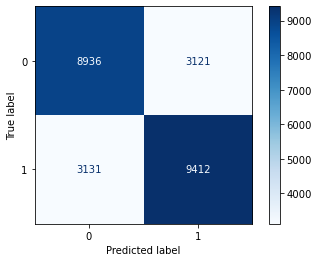

In [271]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,ridge_mod_cv.predict(X_test))))
plot_confusion_matrix(ridge_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

#### 4.2.1.3. Logistic regression with cross-validation and 'Lasso' Regularization**

In [272]:
# Lasso

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

lasso_mod_cv = linear_model.LogisticRegressionCV(max_iter=100,penalty='l1',solver='liblinear',Cs=alphas).fit(X_train, y_train)

Accuracy = 0.7491


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


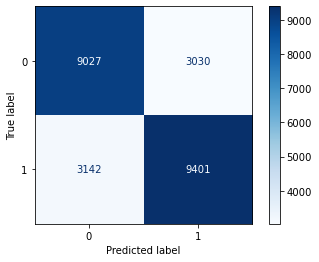

In [273]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,lasso_mod_cv.predict(X_test))))
plot_confusion_matrix(lasso_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

### 4.2.2. Decision Tree Classifier models

#### 4.2.2.1. One decision tree

In [274]:
df_treec = DecisionTreeClassifier(random_state=42)
df_treec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.7791


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


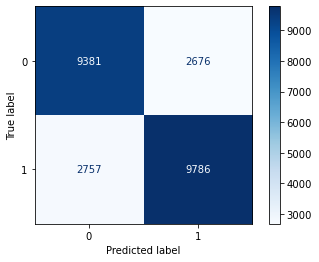

In [275]:
predictions = df_treec.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,df_treec.predict(X_test))))
plot_confusion_matrix(df_treec, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

In [276]:
# Casting the columns into string before ploting

X_train.columns = X_train.columns.map(str)

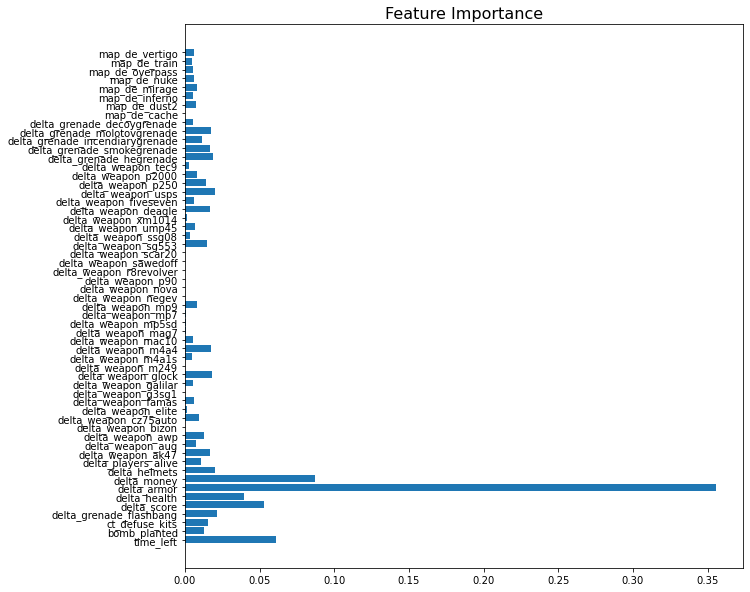

In [277]:
# Plotting the feature importance

plt.figure(figsize=(10,10))
plt.barh(X_train.columns, df_treec.feature_importances_)
plt.title('Feature Importance', fontsize=16);

Now we will try to improve the accuracy fine-tuning the hyperparameters with GridSearch

In [278]:
param_grid = {'max_depth': range(1,60)}

df_treec_pruned_cv = GridSearchCV(df_treec, 
                   param_grid,
                   scoring='accuracy',
                   cv=10 , n_jobs= 6, verbose=1)

df_treec_pruned_cv.fit(X,y)
print("Best score found on development set:")
print()
print(df_treec_pruned_cv.best_score_)
print("Best parameters set found on development set:")
print()
print(df_treec_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = df_treec_pruned_cv.cv_results_['mean_test_score']
stds = df_treec_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, df_treec_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 10 folds for each of 59 candidates, totalling 590 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   36.6s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 590 out of 590 | elapsed:  3.1min finished


Best score found on development set:

0.7863267441895057
Best parameters set found on development set:

{'max_depth': 45}

Grid scores on development set:

Accuracy = 0.716 (+/0.006) for {'max_depth': 1}
Accuracy = 0.716 (+/0.006) for {'max_depth': 2}
Accuracy = 0.730 (+/0.011) for {'max_depth': 3}
Accuracy = 0.730 (+/0.012) for {'max_depth': 4}
Accuracy = 0.740 (+/0.010) for {'max_depth': 5}
Accuracy = 0.741 (+/0.011) for {'max_depth': 6}
Accuracy = 0.744 (+/0.010) for {'max_depth': 7}
Accuracy = 0.745 (+/0.012) for {'max_depth': 8}
Accuracy = 0.746 (+/0.008) for {'max_depth': 9}
Accuracy = 0.748 (+/0.008) for {'max_depth': 10}
Accuracy = 0.748 (+/0.010) for {'max_depth': 11}
Accuracy = 0.749 (+/0.012) for {'max_depth': 12}
Accuracy = 0.753 (+/0.011) for {'max_depth': 13}
Accuracy = 0.755 (+/0.013) for {'max_depth': 14}
Accuracy = 0.757 (+/0.009) for {'max_depth': 15}
Accuracy = 0.759 (+/0.011) for {'max_depth': 16}
Accuracy = 0.759 (+/0.011) for {'max_depth': 17}
Accuracy = 0.761 (+/

Text(0, 0.5, 'Accuracy')

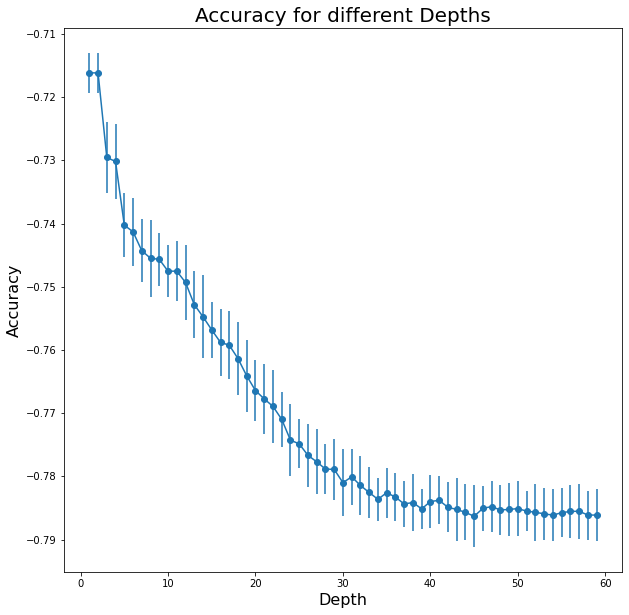

In [281]:
plt.figure(figsize=(10,10))
plt.errorbar(range(1,60,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

#### 4.2.2.2. Bagging

In [286]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)

In [287]:
y_test_pred=bag_model.predict(X_test)

print(bag_model.score(X_test, y_test))

# print(confusion_matrix(y_test, y_test_pred)) 

#sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap=plt.cm.Blues)

0.840609756097561


#### 4.2.2.3. Random Forest Classifier

##### 4.2.2.3.1. Random Forest Classifier with default parameters

In [462]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [463]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8441463414634146


##### 4.2.2.3.2. Random Forest Classifier + randomized search CV

In this section we show the code we used to run a Randomized Search with Cross Validation in order to try variuos combinations pf hyperparameters for the Random Forest Classifier and find the combination that performs best on the validation set. In addition, a 5 fold cross validation is performed in order to have more robust results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [ ]:
#Setting model parameters - final set of parameters we used
#number of trees
n_estimators = [500, 700, 750, 800, 850, 900, 1000, 1200, 1500]
#max number of features to consider at every split
max_features = ['auto', 'log2']
#max number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80]
max_depth.append(None)
#minimum number of samples required to split a node
min_sample_split = [2, 5, 10, 15, 20]


In [ ]:
model_params = {
    
    'n_estimators': n_estimators,

    'max_features': max_features,
    
    'max_depth': max_depth,
    
    'min_samples_split': min_sample_split
        
}

In [ ]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
clf = RandomizedSearchCV(rf_model, model_params, n_iter=300, cv=5, random_state=1, n_jobs= 2, scoring = 'accuracy', verbose=1, return_train_score = True)

# train the random search meta-estimator to find the best model
#model = clf.fit(X_train, y_train) depends if you want to fit only the train set created by splitting the train set he provided or fit the full train set he provided
model = clf.fit(X, y)

In [ ]:
# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())
print(model.best_score_)

In [ ]:
# generate predictions using the best-performing model
from sklearn import metrics
predictions = model.predict(X_test)
#print(predictions)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

We impute in the classifier the best combinations of parameters identified with RandomizedSearchCV on another notebook

In [326]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap= True, 
                           class_weight= None, 
                           criterion= 'gini', 
                           max_depth= 70,
                           max_features= 'log2',
                           max_leaf_nodes= None,
                           min_impurity_decrease= 0.0,
                           min_impurity_split= None,
                           min_samples_leaf= 1,
                           min_samples_split= 2,
                           min_weight_fraction_leaf= 0.0,
                           n_estimators= 850,
                           n_jobs=6,
                           oob_score= False,
                           random_state= None,
                           verbose=1,
                           warm_start= False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   17.7s
[Parallel(n_jobs=6)]: Done 850 out of 850 | elapsed:   19.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 850 out of 850 | elapsed:    1.4s finished


In [327]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8504065040650407


In the main document we say that the accuracy is as of: 0.8547, while in the previous line of code is: 0.8504.

The difference arise because we trained in a different machine the algorithm with the full 'train_set' using RandomizeSearchCV and extracted the best parameters that we used on the previous cell.

The 0.8547 is the cross-validation accuracy provided by the RandomizeSearchCV using 100% of the 'train_set', while the 0.8504 has been trained on 70% of the 'train_set'

#### 4.2.4. XGBoost model

XGBoost with default parameters

In [ ]:
import xgboost
from sklearn.metrics import plot_confusion_matrix, accuracy_score

xgb_tree = xgboost.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_tree.fit(X_train, y_train)
predictions = xgb_tree.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,xgb_tree.predict(X_test))))
plot_confusion_matrix(xgb_tree, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

XGBoost using Randomised Search to find best parameters

In [ ]:
from scipy.stats import randint, uniform
params = {
        'n_estimators': randint(150, 500),
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        "learning_rate": uniform(0.01, 0.1),
        'subsample': [0.6, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5, 5, 6, 7, 8]
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(xgb_tree, param_distributions=params, random_state=42, n_iter=300, cv=5, verbose=1, n_jobs= 4, return_train_score=True, scoring = 'accuracy')
search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(search.best_params_)
print()
print("Grid scores on development set:")
print()
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("MSE = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
predictions = search.best_estimator_.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,search.best_estimator_.predict(X_test))))
#plot_confusion_matrix(search.best_estimator_, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

We impute in the classifier the best combinations of parameters identified with RandomizedSearchCV on another notebook

Accuracy = 0.8227


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


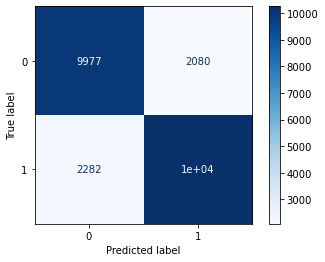

In [288]:
xgb_tree = xgboost.XGBClassifier(objective="binary:logistic",
                                 random_state=42,
                                 colsample_bytree= 1.0,
                                 gamma= 0,
                                 learning_rate= 0.10255685129067764,
                                 max_depth= 8,
                                 min_child_weight= 1,
                                 n_estimators= 451,
                                 subsample= 0.6)
xgb_tree.fit(X_train, y_train)
predictions = xgb_tree.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,xgb_tree.predict(X_test))))
plot_confusion_matrix(xgb_tree, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

### 4.2.4. Support Vector Machines (SVM) model

Accuracy = 0.7211


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


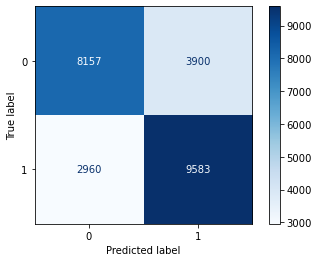

In [53]:
# Basic SVM with default values
SVM_mod = svm.SVC(verbose=1)
SVM_mod.fit(X_train, y_train)
predictions = SVM_mod.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,SVM_mod.predict(X_test))))
plot_confusion_matrix(SVM_mod, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

As can be seen by the accuracy obtained from the 'default' SVM, is very important to fine tune the hyperparameters of this algorithm.

The problem is that it takes a lot of time to compute, below we have the code we would have loved to run but couldn't due to time constraints and lack of computational power

#### 4.2.4.1. SVM + RandomizedSearchCV + kernel=linear

Considering the computational power of our computers, we decided not to test all the hyperparameters of SVM and instead of using GridSearch we will use RandomizedSearch

In [ ]:
# Using 'RandomizedSearchCV' for tuning the most relevant hyperparameters of the SVM model kernel = linear

param_grid = {"C":[0.01, 0.1, 1, 10, 100, 1000]}
n_iter_search = 20

estimator = RandomizedSearchCV(svm.SVC(kernel='linear'), param_distributions=param_grid, cv=5, n_iter=n_iter_search, verbose=1, n_jobs=6)
estimator.fit(X_train, y_train);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))

scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C'])))

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()

#### 4.2.4.2. SVM + RandomizedSearchCV + kernel=rbf

In [ ]:
# Using 'RandomizedSearchCV' for tuning the most relevant hyperparameters of the SVM model kernel = linear

param_grid = {"C":[0.01, 0.1, 1, 10, 100, 1000], "gamma":[0.1, 0.01, 0.001, 1, 10, 100]}
n_iter_search = 20

estimator = RandomizedSearchCV(svm.SVC(kernel='rbf'), param_distributions=param_grid, cv=5, n_iter=n_iter_search, verbose=1, n_jobs=6)
estimator.fit(X_train, y_train);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))

scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

In [ ]:
# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()

#### 4.2.4.3. SVM + RandomizedSearchCV + kernel=poly

In [ ]:
# Using 'RandomizedSearchCV' for tuning the most relevant hyperparameters of the SVM model kernel = linear

param_grid = {"C":[0.01, 0.1, 1, 10, 100, 1000], "gamma":[0.1, 0.01, 0.001, 1, 10, 100]}
n_iter_search = 20

estimator = RandomizedSearchCV(svm.SVC(kernel='poly'), param_distributions=param_grid, cv=5, n_iter=n_iter_search, verbose=1, n_jobs=6)
estimator.fit(X_train, y_train);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))

scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

In [ ]:
# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()

#### [Get back](#tc)

## 4.3 Testing dataset: df = weapcat_deltaa_df
<a id='4.3.'></a>

In [621]:
# Uncomment the desired dataset for modelling:

# df_mod = df.copy()   
# df_mod = delta_df.copy()
df_mod = weapcat_deltaa_df2.copy()
# df_mod = pca_weapcat_deltaa_df.copy()

In [622]:
# Define the function to split the dataset into train-test 
def split_df(dataframe, seed=None, percentage=0.7):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return train_test_split(X, y, test_size=1-percentage, random_state=42)

In [623]:
# Before starting we split the dataset

X_train, X_test, y_train, y_test = split_df(df_mod)

In [624]:
# Define the function to split the dataset into train-test 

def split_df_x_y(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return X, y

In [625]:
# Before starting we split the dataset

X, y = split_df_x_y(df_mod)

We split the dataframe in X and y and in 'train' and 'test' because some algorithms do not provide the validation score.
For those algorithms and methods that do provide the validation score we will use the full dataset (extracting the validation score)

### 4.1.1. Logistic regression model

#### 4.1.1.1. Pure logistic regression

In [296]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter=100, solver='liblinear')
model.fit(X_train, y_train) #fit log regression on train data

LogisticRegression(solver='liblinear')

In [297]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,model.predict(X_test))))

Accuracy = 0.7384


#### 4.1.1.2. Logistic regression with cross-validation and 'Ridge' regularization

In [298]:
# Ridge

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

ridge_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l2',Cs=alphas, n_jobs=6).fit(X_train, y_train)

Accuracy = 0.7459


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


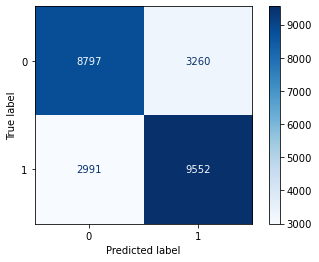

In [299]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,ridge_mod_cv.predict(X_test))))
plot_confusion_matrix(ridge_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

#### 4.1.1.3. Logistic regression with cross-validation and 'Lasso' Regularization**

In [244]:
# Lasso

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

lasso_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l1',solver='liblinear',Cs=alphas, n_jobs = 6, verbose = 1).fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed: 11.1min finished


Accuracy = 0.7506


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


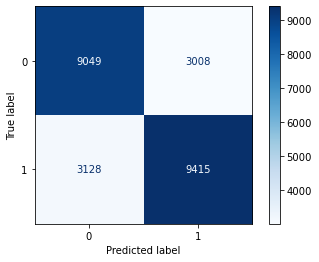

In [245]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,lasso_mod_cv.predict(X_test))))
plot_confusion_matrix(lasso_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

### 4.1.2. Decision Tree Classifier models

#### 4.1.2.1. One decision tree

In [300]:
df_treec = DecisionTreeClassifier(random_state=42)
df_treec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.7678


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


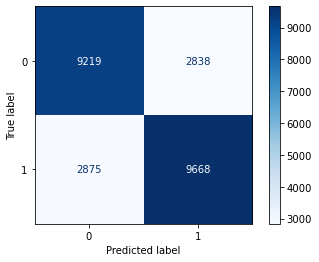

In [301]:
predictions = df_treec.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,df_treec.predict(X_test))))
plot_confusion_matrix(df_treec, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

In [302]:
# Casting the columns into string before ploting

X_train.columns = X_train.columns.map(str)

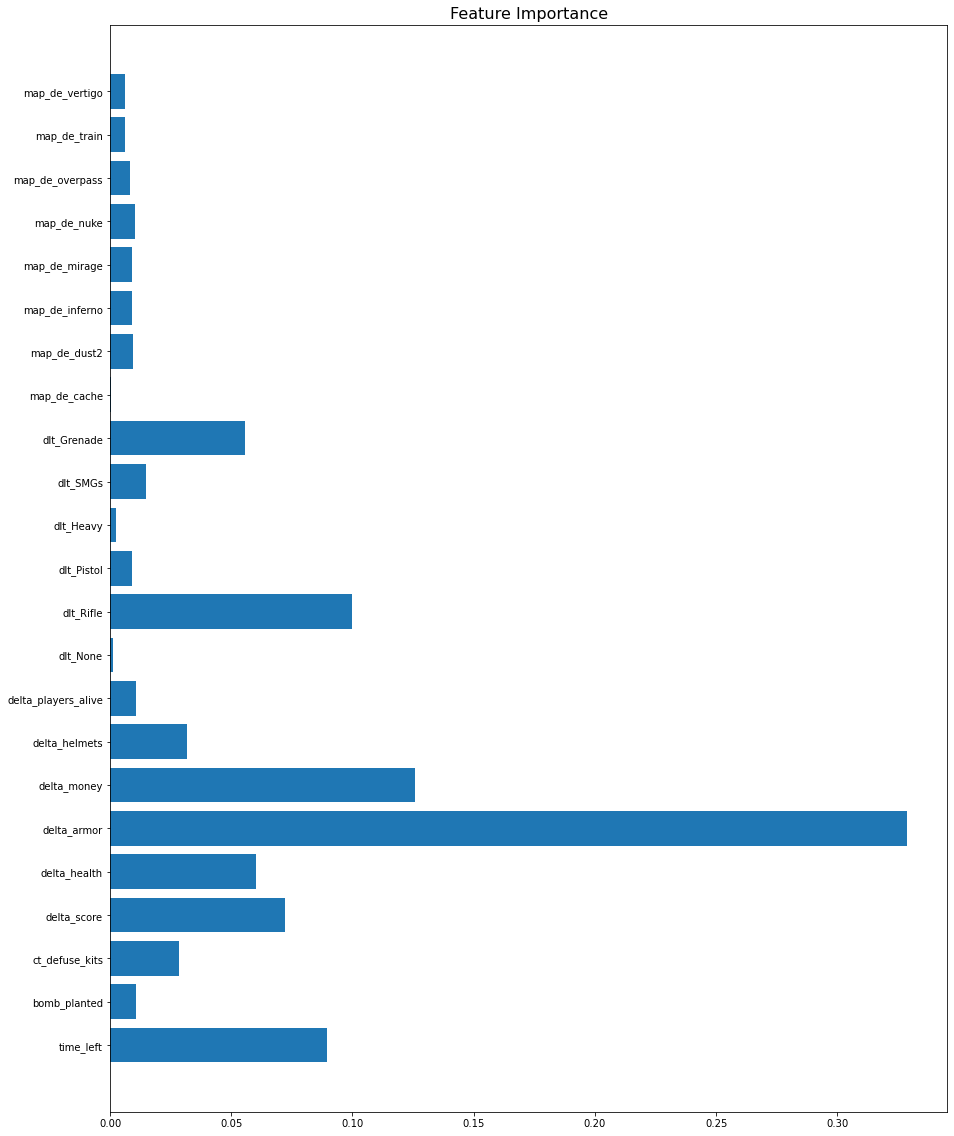

In [303]:
# Plotting the feature importance

plt.figure(figsize=(15,20))
plt.barh(X_train.columns, df_treec.feature_importances_)
plt.title('Feature Importance', fontsize=16);

Now we will try to improve the accuracy fine-tuning the hyperparameters with GridSearch

In [304]:
param_grid = {'max_depth': range(1,60)}

df_treec_pruned_cv = GridSearchCV(df_treec, 
                   param_grid,
                   scoring='accuracy',
                   cv=10 , n_jobs= 6, verbose=1)

df_treec_pruned_cv.fit(X,y)
print("Best score found on development set:")
print()
print(df_treec_pruned_cv.best_score_)
print("Best parameters set found on development set:")
print()
print(df_treec_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = df_treec_pruned_cv.cv_results_['mean_test_score']
stds = df_treec_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, df_treec_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 10 folds for each of 59 candidates, totalling 590 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   19.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 590 out of 590 | elapsed:  1.5min finished


Best score found on development set:

0.773668127285005
Best parameters set found on development set:

{'max_depth': 56}

Grid scores on development set:

Accuracy = 0.716 (+/0.006) for {'max_depth': 1}
Accuracy = 0.716 (+/0.006) for {'max_depth': 2}
Accuracy = 0.726 (+/0.007) for {'max_depth': 3}
Accuracy = 0.729 (+/0.007) for {'max_depth': 4}
Accuracy = 0.743 (+/0.010) for {'max_depth': 5}
Accuracy = 0.744 (+/0.011) for {'max_depth': 6}
Accuracy = 0.746 (+/0.011) for {'max_depth': 7}
Accuracy = 0.748 (+/0.008) for {'max_depth': 8}
Accuracy = 0.750 (+/0.008) for {'max_depth': 9}
Accuracy = 0.751 (+/0.006) for {'max_depth': 10}
Accuracy = 0.749 (+/0.007) for {'max_depth': 11}
Accuracy = 0.753 (+/0.009) for {'max_depth': 12}
Accuracy = 0.754 (+/0.009) for {'max_depth': 13}
Accuracy = 0.755 (+/0.009) for {'max_depth': 14}
Accuracy = 0.754 (+/0.008) for {'max_depth': 15}
Accuracy = 0.754 (+/0.012) for {'max_depth': 16}
Accuracy = 0.758 (+/0.008) for {'max_depth': 17}
Accuracy = 0.758 (+/0

In [305]:
means

array([0.71614288, 0.71614288, 0.72646006, 0.72864305, 0.74258221,
       0.74426515, 0.74604565, 0.74817982, 0.75043596, 0.75054573,
       0.74936279, 0.7527531 , 0.75364338, 0.75454582, 0.75430189,
       0.75422872, 0.75754585, 0.75770439, 0.75848487, 0.75785077,
       0.7590459 , 0.75970442, 0.76089958, 0.76358254, 0.76342402,
       0.76509478, 0.7658265 , 0.76908268, 0.76933878, 0.77009486,
       0.77007047, 0.7702412 , 0.77087538, 0.77155829, 0.77185097,
       0.77165588, 0.77281443, 0.77257055, 0.77225346, 0.77207055,
       0.77226568, 0.77266809, 0.77193639, 0.77300957, 0.77302178,
       0.77333882, 0.77170468, 0.77170467, 0.77285103, 0.77270471,
       0.77300956, 0.77246081, 0.77318032, 0.77281446, 0.77255832,
       0.77366813, 0.77276562, 0.77329007, 0.77238758])

Text(0, 0.5, 'Accuracy')

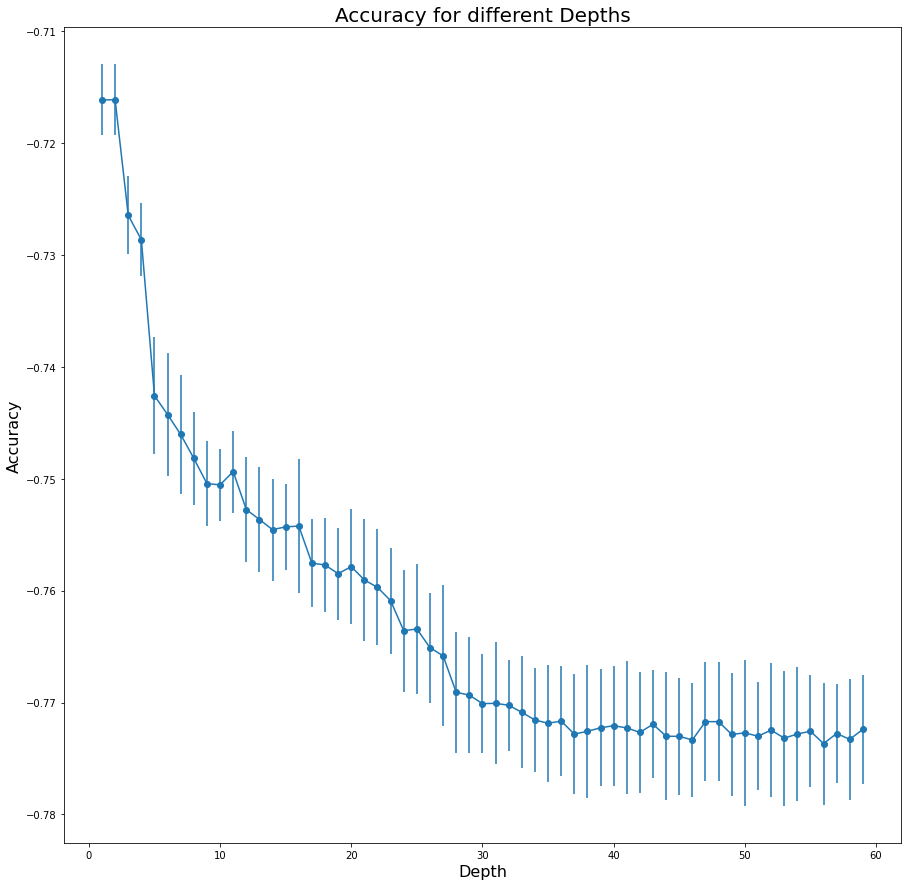

In [306]:
plt.figure(figsize=(15,15))
plt.errorbar(range(1,60,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

#### 4.1.2.2. Bagging

In [307]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, n_jobs = 6, verbose = 1)
bag_model=bag_model.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    9.3s remaining:   18.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    9.7s finished


In [308]:
y_test_pred=bag_model.predict(X_test)

print(bag_model.score(X_test, y_test))

# print(confusion_matrix(y_test, y_test_pred)) 

#sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap=plt.cm.Blues)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.4s finished


0.8191869918699187


#### 4.1.2.3. Random Forest Classifier with default parameters

In [309]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [310]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8226829268292682


In [627]:
#Setting model parameters
#number of trees
n_estimators = [100]


In [628]:
model_params = {
    
    'n_estimators': n_estimators
    
}

In [629]:
clf=RandomForestClassifier(n_estimators=100)

estimator = GridSearchCV(clf, param_grid=model_params, cv=5, verbose=1, n_jobs=6, return_train_score=True, scoring = 'accuracy')

estimator.fit(X, y);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   17.7s finished


The best parameters are {'n_estimators': 100} with a score of 0.82895


#### [Get back](#tc)

## 4.4 Testing dataset: df = pca_weapcat_deltaa_df
<a id='4.4.'></a>

In [611]:
# Uncomment the desired dataset for modelling:

# df_mod = df.copy()   
# df_mod = delta_df.copy()
# df_mod = weapcat_deltaa_df.copy()
df_mod = pca_weapcat_deltaa_df.copy()

In [612]:
# Define the function to split the dataset into train-test 
def split_df(dataframe, seed=None, percentage=0.7):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return train_test_split(X, y, test_size=1-percentage, random_state=42)

In [613]:
# Before starting we split the dataset

X_train, X_test, y_train, y_test = split_df(df_mod)

In [614]:
# Define the function to split the dataset into train-test 

def split_df_x_y(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return X, y

In [615]:
# Before starting we split the dataset

X, y = split_df_x_y(df_mod)

We split the dataframe in X and y and in 'train' and 'test' because some algorithms do not provide the validation score.
For those algorithms and methods that do provide the validation score we will use the full dataset (extracting the validation score)

### 4.1.1. Logistic regression model

#### 4.1.1.1. Pure logistic regression

In [342]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter=100, solver='liblinear')
model.fit(X_train, y_train) #fit log regression on train data

LogisticRegression(solver='liblinear')

In [343]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,model.predict(X_test))))

Accuracy = 0.7461


#### 4.1.1.2. Logistic regression with cross-validation and 'Ridge' regularization

In [344]:
# Ridge

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

ridge_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l2',Cs=alphas, n_jobs=6).fit(X_train, y_train)

Accuracy = 0.7460


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


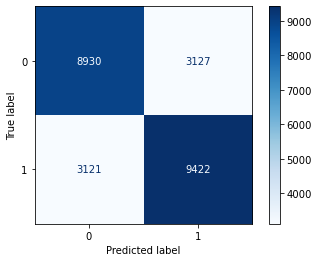

In [345]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,ridge_mod_cv.predict(X_test))))
plot_confusion_matrix(ridge_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

#### 4.1.1.3. Logistic regression with cross-validation and 'Lasso' Regularization**

In [346]:
# Lasso

# Setting different parameters to test
alphas = 10**np.linspace(-1,-4,100)

lasso_mod_cv = linear_model.LogisticRegressionCV(max_iter=1000,penalty='l1',solver='liblinear',Cs=alphas, n_jobs = 6, verbose = 1).fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   17.0s finished


Accuracy = 0.7463


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


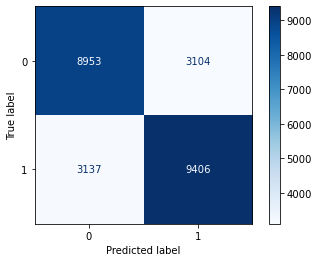

In [347]:
print("Accuracy = {0:.4f}".format(accuracy_score(y_test,lasso_mod_cv.predict(X_test))))
plot_confusion_matrix(lasso_mod_cv, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

### 4.1.2. Decision Tree Classifier models

#### 4.1.2.1. One decision tree

In [348]:
df_treec = DecisionTreeClassifier(random_state=42)
df_treec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.7296


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


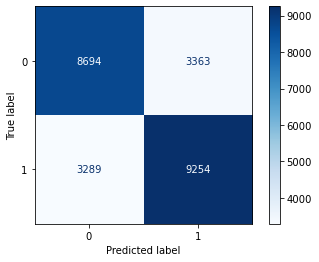

In [349]:
predictions = df_treec.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,df_treec.predict(X_test))))
plot_confusion_matrix(df_treec, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)

In [350]:
# Casting the columns into string before ploting

X_train.columns = X_train.columns.map(str)

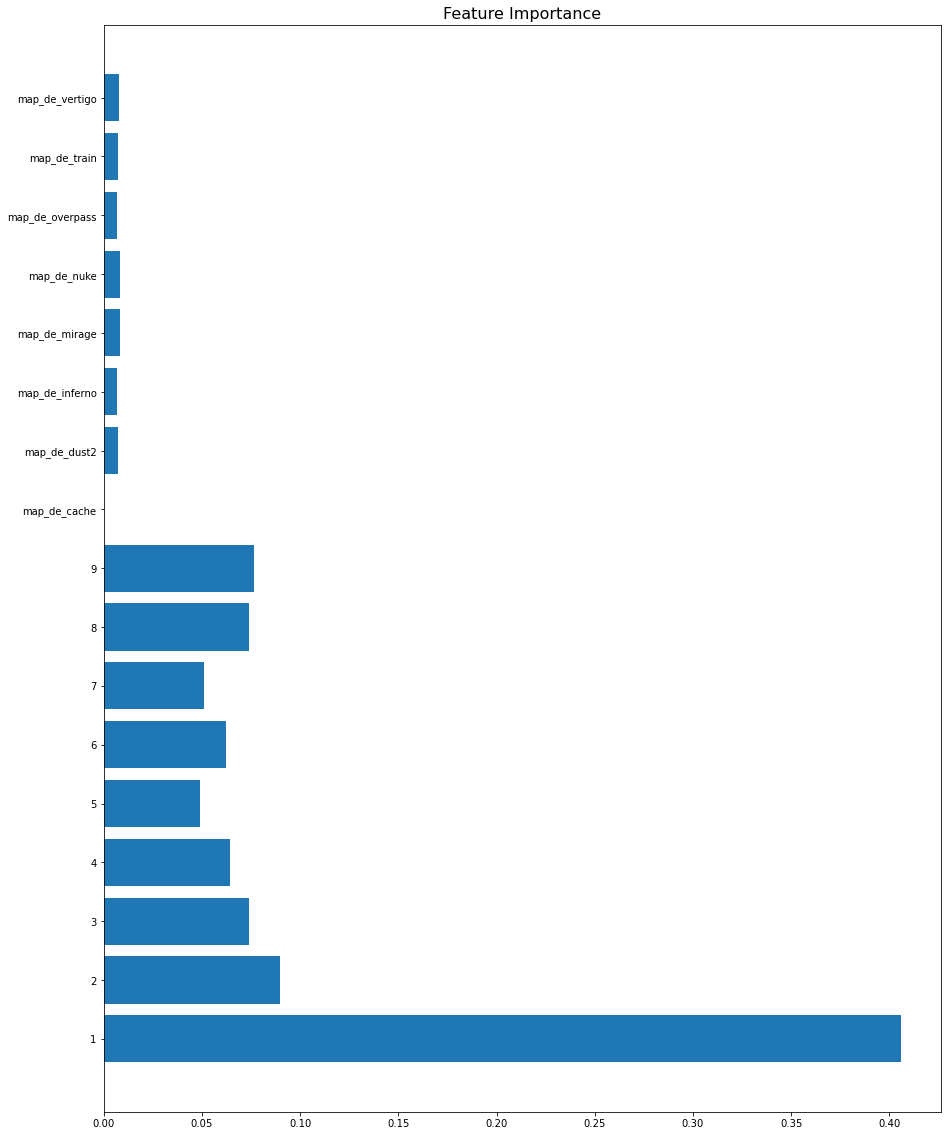

In [351]:
# Plotting the feature importance

plt.figure(figsize=(15,20))
plt.barh(X_train.columns, df_treec.feature_importances_)
plt.title('Feature Importance', fontsize=16);

Now we will try to improve the accuracy fine-tuning the hyperparameters with GridSearch

In [352]:
param_grid = {'max_depth': range(1,60)}

df_treec_pruned_cv = GridSearchCV(df_treec, 
                   param_grid,
                   scoring='accuracy',
                   cv=10 , n_jobs= 6, verbose=1)

df_treec_pruned_cv.fit(X,y)
print("Best score found on development set:")
print()
print(df_treec_pruned_cv.best_score_)
print("Best parameters set found on development set:")
print()
print(df_treec_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = df_treec_pruned_cv.cv_results_['mean_test_score']
stds = df_treec_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, df_treec_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 10 folds for each of 59 candidates, totalling 590 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 218 tasks      | elapsed:   44.3s
[Parallel(n_jobs=6)]: Done 468 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 590 out of 590 | elapsed:  2.7min finished


Best score found on development set:

0.7493018407955759
Best parameters set found on development set:

{'max_depth': 9}

Grid scores on development set:

Accuracy = 0.740 (+/0.008) for {'max_depth': 1}
Accuracy = 0.740 (+/0.008) for {'max_depth': 2}
Accuracy = 0.740 (+/0.008) for {'max_depth': 3}
Accuracy = 0.743 (+/0.009) for {'max_depth': 4}
Accuracy = 0.743 (+/0.009) for {'max_depth': 5}
Accuracy = 0.745 (+/0.011) for {'max_depth': 6}
Accuracy = 0.746 (+/0.012) for {'max_depth': 7}
Accuracy = 0.747 (+/0.009) for {'max_depth': 8}
Accuracy = 0.749 (+/0.009) for {'max_depth': 9}
Accuracy = 0.748 (+/0.010) for {'max_depth': 10}
Accuracy = 0.749 (+/0.007) for {'max_depth': 11}
Accuracy = 0.747 (+/0.008) for {'max_depth': 12}
Accuracy = 0.748 (+/0.008) for {'max_depth': 13}
Accuracy = 0.745 (+/0.007) for {'max_depth': 14}
Accuracy = 0.745 (+/0.009) for {'max_depth': 15}
Accuracy = 0.745 (+/0.009) for {'max_depth': 16}
Accuracy = 0.744 (+/0.010) for {'max_depth': 17}
Accuracy = 0.742 (+/0

In [353]:
means

array([0.74042368, 0.74042368, 0.74042368, 0.74335055, 0.74337493,
       0.74487497, 0.74591155, 0.74707013, 0.74930184, 0.74810671,
       0.74920428, 0.74748471, 0.74755786, 0.7446554 , 0.74505786,
       0.74476521, 0.744253  , 0.74165536, 0.74098466, 0.73986269,
       0.73852116, 0.73777727, 0.73526508, 0.73699682, 0.73635045,
       0.73539922, 0.73630167, 0.73572847, 0.73546022, 0.73485043,
       0.73446017, 0.73446017, 0.73531385, 0.73636266, 0.73610654,
       0.7350577 , 0.7359114 , 0.73544797, 0.73576508, 0.73636267,
       0.73714316, 0.73619189, 0.73622851, 0.73625287, 0.73635045,
       0.73641142, 0.73487483, 0.73669192, 0.73653337, 0.73617972,
       0.73627723, 0.73636263, 0.73591141, 0.73616751, 0.73616751,
       0.73602117, 0.735948  , 0.73624068, 0.73599678])

Text(0, 0.5, 'Accuracy')

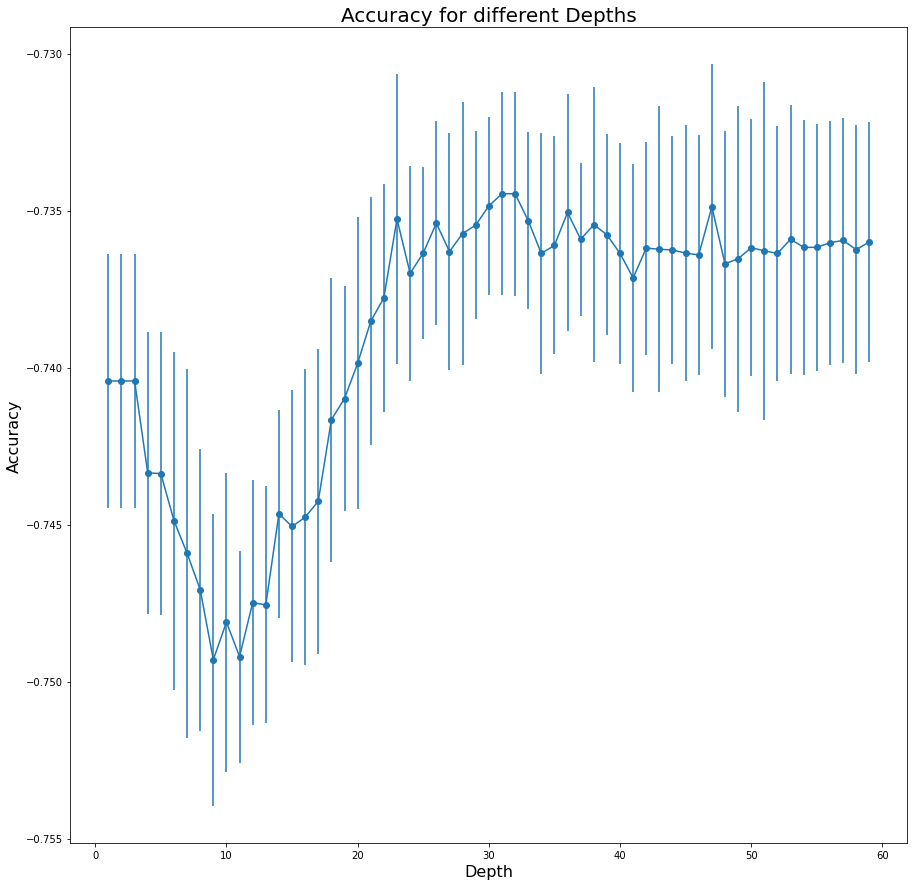

In [354]:
plt.figure(figsize=(15,15))
plt.errorbar(range(1,60,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

#### 4.1.2.2. Bagging

In [619]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, n_jobs = 6, verbose = 1)
bag_model=bag_model.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   20.2s remaining:   40.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   21.7s finished


In [620]:
y_test_pred=bag_model.predict(X_test)

print(bag_model.score(X_test, y_test))

# print(confusion_matrix(y_test, y_test_pred)) 

#sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap=plt.cm.Blues)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.5s


0.7892682926829269


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.4s finished


#### 4.1.2.3. Random Forest Classifier with default parameters

In [357]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [358]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.797439024390244


In [616]:
#Setting model parameters
#number of trees
n_estimators = [100]


In [617]:
model_params = {
    
    'n_estimators': n_estimators
    
}

In [618]:
clf=RandomForestClassifier(n_estimators=100)

estimator = GridSearchCV(clf, param_grid=model_params, cv=5, verbose=1, n_jobs=6, return_train_score=True, scoring = 'accuracy')

estimator.fit(X, y);

print("The best parameters are %s with a score of %0.5f"
      % (estimator.best_params_, estimator.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   28.4s finished


The best parameters are {'n_estimators': 100} with a score of 0.79908


#### [Get back](#tc)

 # 5. Best model - training
 <a id='5'></a>

In [90]:
# We use as final train dataset the delta_df

df_mod = delta_df.copy()

In [91]:
# Define the function to split the dataset into train-test 

def split_df_x_y(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'round_winner']
    y = dataframe['round_winner']

    return X, y

In [92]:
# Before starting we split the dataset

X, y = split_df_x_y(df_mod)

Here we train the final model with the full train set, using the best hyper parameters found in the Randomised Search we conducted.

In [93]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap= True, 
                           class_weight= None, 
                           criterion= 'gini', 
                           max_depth= 70,
                           max_features= 'log2',
                           max_leaf_nodes= None,
                           min_impurity_decrease= 0.0,
                           min_impurity_split= None,
                           min_samples_leaf= 1,
                           min_samples_split= 2,
                           min_weight_fraction_leaf= 0.0,
                           n_estimators= 850,
                           n_jobs=6,
                           oob_score= False,
                           random_state= 42,
                           verbose=1,
                           warm_start= False)

# Fit the model with the full train set
clf.fit(X, y)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   29.0s
[Parallel(n_jobs=6)]: Done 850 out of 850 | elapsed:   31.2s finished


RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=850,
                       n_jobs=6, random_state=42, verbose=1)

#### [Get back](#tc)

 # 6. Final model - test
  <a id='6'></a>

Once we tried several combinations of models with the different datasets we are going to optimize the one (dataset + models) that bear the best results until now.

We will then train that model with the full Dataset (without spliting) and then use that with the Test.dataset provided

In [94]:
# upload test df again if needed
testdf = pd.read_csv('test_set.csv')

In [95]:
testdf.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,11.0,4.0,de_vertigo,False,500.0,500.0,400.0,300.0,700.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,94.95,8.0,4.0,de_dust2,False,400.0,450.0,400.0,477.0,10300.0,...,4.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
2,14.93,14.0,10.0,de_dust2,False,366.0,100.0,395.0,98.0,2350.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,46.27,12.0,15.0,de_nuke,False,400.0,446.0,399.0,434.0,300.0,...,1.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
4,37.07,18.0,18.0,de_train,False,100.0,200.0,100.0,200.0,10100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
# Converting column 'bomb_planted' into a numeric

testdf['bomb_planted'] = testdf['bomb_planted'].astype('float64')
testdf['bomb_planted'].unique()

array([0., 1.])

In [97]:
# We organize the columns so the single columns are first and the columns that come in "tuples" stay together. e.g. all counter terrorist related column and terrorist related columns

cols_to_order = ['time_left', 'map','bomb_planted',  'ct_defuse_kits', 'ct_grenade_flashbang', 't_grenade_flashbang']
new_columns = cols_to_order + (testdf.columns.drop(cols_to_order).tolist())
testdf = testdf[new_columns]

**Feature Engineering**

In [98]:
# create delta_df dataframe calculating the difference between the tuples for ct and t

testdf_1 = testdf.copy()
delta_testdf = pd.DataFrame(testdf.iloc[:,0:4])

i = 4

# we create the delta columns
while i < (len(testdf.columns)):
    
    a = testdf_1.iloc[:,i]
    b = testdf_1.iloc[:,i+1]
    testdf_1['delta_'+testdf_1.iloc[:,i].name[3:]] = a - b
    
    delta_testdf['delta_'+testdf_1.iloc[:,i].name[3:]] = a - b
    i = i + 2

**Encode categorical variables**

In [99]:
# Create an one-hot encoder for map variables in the delta_df dataframe
# In order to transform categorical variables into dummy variables we used 'one-hot enconder'

ohe = OneHotEncoder()

delta_testdf['map'] = delta_testdf.map.astype('category')
categorical_cols = delta_testdf.columns[delta_testdf.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(delta_testdf[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True)

delta_testdf = pd.concat([delta_testdf, hot_enc], axis = 1)
delta_testdf = delta_testdf.drop(['map'], axis=1)

delta_testdf.head(2)

,time_left,bomb_planted,ct_defuse_kits,delta_grenade_flashbang,delta_score,delta_health,delta_armor,delta_money,delta_helmets,delta_players_alive,...,delta_grenade_molotovgrenade,delta_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,1.0,-1.0,7.0,0.0,100.0,150.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,94.95,0.0,4.0,2.0,4.0,-50.0,-77.0,3400.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Predict round winner for the test df**

In [100]:
# generate predictions using the best-performing model
predictions = clf.predict(delta_testdf)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 850 out of 850 | elapsed:    2.6s finished


In [101]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
final_pred = pd.DataFrame(predictions, index = testdf.index)

In [103]:
final_pred.to_csv('prediction_test.csv', index = True)

#### [Get back](#tc)